<a href="https://colab.research.google.com/github/tiagoalvescordeiro/rede_neural_fase6/blob/main/TiagoAlves_rm561791_pbl_fase6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Fase 6 – Rede Neural (YOLOv5 e Comparativos)

Este notebook é a implementação da Fase 6 do projeto de IA da FIAP para o grupo **rede_neural_fase6**. O objetivo é demonstrar o desenvolvimento de um sistema de visão computacional utilizando **YOLOv5**, avaliando sua performance e comparando com abordagens alternativas:

- YOLOv5 customizado para reconhecer dois objetos (A e B) a partir de um dataset próprio.
- Detecção com YOLOv5 pré-treinado (baseline zero-shot).
- Classificação de imagens com uma **CNN treinada do zero**.

Prepare seu ambiente seguindo as instruções e execute cada etapa em sequência. Onde indicado, substitua pelos caminhos corretos para suas imagens no Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive


'69253_cadastral.zip (Unzipped Files)'
'69253_stvm.zip (Unzipped Files)'
'69253_stvm.zip (Unzipped Files) (1)'
'69253_stvm.zip (Unzipped Files) (2)'
'Apresentação do Projeto Blumenau Flood Seer com Im....gdoc'
'BeigeBook_20220420 (1) (1).pdf'
 BoletoCartaCobranca.htm
'Bradesco - Curso Tesouro Direto - Blumenau - 20.08.2015 (1).zdoc'
'Bradesco - Curso Tesouro Direto - Blumenau - 20.08.2015.docx'
'Bradesco - Curso Tesouro Direto - Blumenau - 20.08.2015.zdoc'
'Cebesa CEA Parte 1.pdf'
'Cebesa CEA Parte 2.pdf'
'Colab Notebooks'
'Cópia de Modelo Plano de Ação Patrimono (1).gslides'
'Cópia de Modelo Plano de Ação Patrimono.gslides'
'Cópia de Tiago Alves Cordeiro.doc'
'Darlan Fiis.xlsx'
 Desktop
'Destaque do Mês  Bradesco Corretora.oft'
'Dia das Crianças.gdoc'
'Documento sem título (1).gdoc'
'Documento sem título (2).gdoc'
'Documento sem título (3).gdoc'
'Documento sem título.gdoc'
 email_cob_3667924_080637.pdf
'Evento Pomerode.gdoc'
 Fase6_YOLO
 FIAP_1_S
 FIAP_5
'Formulário se

In [3]:
!ls /content/drive/MyDrive/Fase6_YOLO


'WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg'
'WhatsApp Image 2025-10-10 at 14.22.08 (2).jpeg'
'WhatsApp Image 2025-10-10 at 14.22.08.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.09.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.11 (1).jpeg'
'WhatsApp Image 2025-10-10 at 14.22.11.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.13 (1).jpeg'
'WhatsApp Image 2025-10-10 at 14.22.13.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.15.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.16 (1).jpeg'
'WhatsApp Image 2025-10-10 at 14.22.16 (2).jpeg'
'WhatsApp Image 2025-10-10 at 14.22.16.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.17.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.18 (1).jpeg'
'WhatsApp Image 2025-10-10 at 14.22.18.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.19.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.20.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.21.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.23 (1).jpeg'
'WhatsApp Image 2025-10-10 at 14.22.23.jpeg'
'WhatsApp Image 2025-10-10 at 14.22.24 (1).jpeg'
'WhatsApp Image 202

In [5]:
!mkdir -p /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train
!mkdir -p /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/val
!mkdir -p /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test
!mkdir -p /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train
!mkdir -p /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/val
!mkdir -p /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/test


In [6]:
import os, shutil, random

# Caminho base
base = '/content/drive/MyDrive/Fase6_YOLO'
origem = base  # pasta onde estão suas imagens originais
destino = f'{base}/datasets/seu_dataset/images'

# Lista todas as imagens JPEG
imagens = [f for f in os.listdir(origem) if f.lower().endswith('.jpeg')]

# Embaralha aleatoriamente para não pegar sempre as mesmas
random.shuffle(imagens)

# Define as divisões
train = imagens[:40]
val = imagens[40:44]
test = imagens[44:48]

# Função auxiliar para copiar
def mover(lista, pasta):
    for img in lista:
        shutil.copy(os.path.join(origem, img), os.path.join(pasta, img))

# Copia os arquivos
mover(train, f'{destino}/train')
mover(val, f'{destino}/val')
mover(test, f'{destino}/test')

print("✅ Imagens copiadas com sucesso!")


✅ Imagens copiadas com sucesso!


In [7]:
!ls /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train | head -n 10
!ls /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/val
!ls /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test


WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg
WhatsApp Image 2025-10-10 at 14.22.08 (2).jpeg
WhatsApp Image 2025-10-10 at 14.22.08.jpeg
WhatsApp Image 2025-10-10 at 14.22.09.jpeg
WhatsApp Image 2025-10-10 at 14.22.11 (1).jpeg
WhatsApp Image 2025-10-10 at 14.22.11.jpeg
WhatsApp Image 2025-10-10 at 14.22.13 (1).jpeg
WhatsApp Image 2025-10-10 at 14.22.13.jpeg
WhatsApp Image 2025-10-10 at 14.22.15.jpeg
WhatsApp Image 2025-10-10 at 14.22.16 (1).jpeg


In [8]:
from google.colab import files
import io, zipfile, os

# selecione o zip exportado do MakeSense quando solicitado
uploaded = files.upload()  # faça upload do arquivo .zip

# nome e pasta alvo no Drive
target_dir = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train'
os.makedirs(target_dir, exist_ok=True)

# extrai todos os zips enviados (normalmente só 1)
for fn, data in uploaded.items():
    print('Extraindo', fn)
    with zipfile.ZipFile(io.BytesIO(data)) as z:
        z.extractall(target_dir)

print('✅ Arquivos extraídos em:', target_dir)


Saving WhatsApp Image 2025-10-10 at 14.22.08 (1).txt to WhatsApp Image 2025-10-10 at 14.22.08 (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.08 (2).txt to WhatsApp Image 2025-10-10 at 14.22.08 (2).txt
Saving WhatsApp Image 2025-10-10 at 14.22.08.txt to WhatsApp Image 2025-10-10 at 14.22.08.txt
Saving WhatsApp Image 2025-10-10 at 14.22.09.txt to WhatsApp Image 2025-10-10 at 14.22.09.txt
Saving WhatsApp Image 2025-10-10 at 14.22.11 (1).txt to WhatsApp Image 2025-10-10 at 14.22.11 (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.11.txt to WhatsApp Image 2025-10-10 at 14.22.11.txt
Saving WhatsApp Image 2025-10-10 at 14.22.13 (1).txt to WhatsApp Image 2025-10-10 at 14.22.13 (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.13.txt to WhatsApp Image 2025-10-10 at 14.22.13.txt
Saving WhatsApp Image 2025-10-10 at 14.22.15.txt to WhatsApp Image 2025-10-10 at 14.22.15.txt
Saving WhatsApp Image 2025-10-10 at 14.22.16 (1).txt to WhatsApp Image 2025-10-10 at 14.22.16 (1).txt
Saving WhatsApp Imag

BadZipFile: File is not a zip file

In [9]:
from google.colab import files
import io, zipfile, os

# selecione os arquivos (pode ser o ZIP exportado ou vários .txt)
uploaded = files.upload()

target_dir = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train'
os.makedirs(target_dir, exist_ok=True)

import zipfile
for fn, data in uploaded.items():
    try:
        # tenta abrir como ZIP
        with zipfile.ZipFile(io.BytesIO(data)) as z:
            z.extractall(target_dir)
        print(f'✅ ZIP extraído: {fn}')
    except zipfile.BadZipFile:
        # não é ZIP: salva como arquivo (ex.: .txt)
        out_path = os.path.join(target_dir, fn)
        with open(out_path, 'wb') as f:
            f.write(data)
        print(f'✅ Arquivo salvo: {out_path}')

# listagem rápida
files_in_target = sorted(os.listdir(target_dir))
print('\nTotal de arquivos em labels/train:', len(files_in_target))
print(files_in_target[:50])


Saving WhatsApp Image 2025-10-10 at 14.22.08 (1).txt to WhatsApp Image 2025-10-10 at 14.22.08 (1) (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.08 (2).txt to WhatsApp Image 2025-10-10 at 14.22.08 (2) (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.08.txt to WhatsApp Image 2025-10-10 at 14.22.08 (3).txt
Saving WhatsApp Image 2025-10-10 at 14.22.09.txt to WhatsApp Image 2025-10-10 at 14.22.09 (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.11 (1).txt to WhatsApp Image 2025-10-10 at 14.22.11 (1) (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.11.txt to WhatsApp Image 2025-10-10 at 14.22.11 (2).txt
Saving WhatsApp Image 2025-10-10 at 14.22.13 (1).txt to WhatsApp Image 2025-10-10 at 14.22.13 (1) (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.13.txt to WhatsApp Image 2025-10-10 at 14.22.13 (2).txt
Saving WhatsApp Image 2025-10-10 at 14.22.15.txt to WhatsApp Image 2025-10-10 at 14.22.15 (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.16 (1).txt to WhatsApp Image 2025-10-10 at 1

In [10]:
from google.colab import files
import io, zipfile, os

# selecione o arquivo .zip exportado do MakeSense OU selecione todos os .txt
uploaded = files.upload()

target_dir = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train'
os.makedirs(target_dir, exist_ok=True)

for fn, data in uploaded.items():
    try:
        with zipfile.ZipFile(io.BytesIO(data)) as z:
            z.extractall(target_dir)
        print(f'✅ ZIP extraído: {fn}')
    except zipfile.BadZipFile:
        out_path = os.path.join(target_dir, fn)
        with open(out_path, 'wb') as f:
            f.write(data)
        print(f'✅ Arquivo salvo: {out_path}')

print('\nArquivos atuais em labels/train:')
print(sorted(os.listdir(target_dir))[:100])



Arquivos atuais em labels/train:
['WhatsApp Image 2025-10-10 at 14.22.08 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.08 (2) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.08 (3).txt', 'WhatsApp Image 2025-10-10 at 14.22.09 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.11 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.11 (2).txt', 'WhatsApp Image 2025-10-10 at 14.22.13 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.13 (2).txt', 'WhatsApp Image 2025-10-10 at 14.22.15 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.16 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.16 (2) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.16 (3).txt', 'WhatsApp Image 2025-10-10 at 14.22.17 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.18 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.18 (2).txt', 'WhatsApp Image 2025-10-10 at 14.22.19 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.20 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.21 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.23 (1) (1).txt', 'W

In [11]:
import os, random, yaml
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
IMG_DIR = os.path.join(BASE, 'images', 'train')
LBL_DIR = os.path.join(BASE, 'labels', 'train')

imgs = sorted([f for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))])
labels = sorted([f for f in os.listdir(LBL_DIR) if f.lower().endswith('.txt')])

print('Imagens em train:', len(imgs))
print('.txt em labels/train:', len(labels))

imgs_without_label = [f for f in imgs if not os.path.exists(os.path.join(LBL_DIR, os.path.splitext(f)[0]+'.txt'))]
labels_without_img = [f for f in labels if not any(os.path.exists(os.path.join(IMG_DIR, os.path.splitext(f)[0]+ext)) for ext in ('.jpeg','.jpg','.png'))]

print('\nImagens sem label (até 20):', imgs_without_label[:20])
print('\nLabels sem imagem (até 20):', labels_without_img[:20])

# contar boxes por classe
class_counts = {}
unique_classes = set()
for lbl in labels:
    with open(os.path.join(LBL_DIR, lbl), 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts)>=1:
                cls = int(parts[0])
                unique_classes.add(cls)
                class_counts[cls] = class_counts.get(cls,0)+1

print('\nBoxes por classe:', class_counts)

# criar names provisórios
max_class = max(unique_classes) if unique_classes else -1
class_names = [f'objeto_{chr(ord("A")+i)}' for i in range(max_class+1)] if max_class>=0 else []
dataset_yaml = {
    'train': os.path.join(BASE, 'images', 'train'),
    'val': os.path.join(BASE, 'images', 'val'),
    'test': os.path.join(BASE, 'images', 'test'),
    'nc': len(class_names),
    'names': class_names
}
yaml_path = os.path.join(BASE, 'dataset.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(dataset_yaml, f, default_flow_style=False, sort_keys=False, allow_unicode=True)
print('\ndataset.yaml criado em:', yaml_path)
print('names provisórios:', class_names)

# visual check: mostra até 3 imagens com boxes
def draw_yolo_boxes(img_path, txt_path, names):
    img = Image.open(img_path).convert('RGB')
    w,h = img.size
    draw = ImageDraw.Draw(img)
    if os.path.exists(txt_path):
        with open(txt_path) as f:
            for l in f:
                parts = l.split()
                if len(parts)!=5: continue
                cls,x_c,y_c,w_box,h_box = parts
                cls=int(cls); x_c,y_c,w_box,h_box = map(float,(x_c,y_c,w_box,h_box))
                x0=(x_c-w_box/2)*w; y0=(y_c-h_box/2)*h
                x1=(x_c+w_box/2)*w; y1=(y_c+h_box/2)*h
                draw.rectangle([x0,y0,x1,y1], outline='red', width=3)
                lbl = names[cls] if cls < len(names) else str(cls)
                draw.text((max(0,x0), max(0,y0-12)), lbl, fill='red')
    return img

sample = [f for f in imgs if os.path.exists(os.path.join(LBL_DIR, os.path.splitext(f)[0]+'.txt'))]
random.shuffle(sample)
sample = sample[:3]
if sample:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,4))
    for i,im in enumerate(sample):
        plt.subplot(1,3,i+1)
        img_path = os.path.join(IMG_DIR, im)
        txt_path = os.path.join(LBL_DIR, os.path.splitext(im)[0]+'.txt')
        plt.imshow(draw_yolo_boxes(img_path, txt_path, class_names)); plt.axis('off')
    plt.show()
else:
    print('Nenhuma imagem com label encontrada para visualização.')


Imagens em train: 36
.txt em labels/train: 36

Imagens sem label (até 20): ['WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.08 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.08.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.09.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.11 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.11.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.13 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.13.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.15.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.16 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.16 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.16.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.17.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.18 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.18.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.19.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.20.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.21.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.23 (1).jpeg', 'WhatsApp Image 20

In [14]:
import os, re, difflib
BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
IMG_DIR = os.path.join(BASE, 'images', 'train')
LBL_DIR = os.path.join(BASE, 'labels', 'train')

def basename_no_ext(fn):
    return os.path.splitext(fn)[0]

def normalize(s):
    # remove sufixos repetidos como " (1)" e espaços duplicados, lower
    s = re.sub(r'\s*\(\d+\)\s*', ' ', s)  # remove occurrences like " (1)"
    s = re.sub(r'\s+', ' ', s).strip()
    return s.lower()

imgs = sorted([f for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))])
labels = sorted([f for f in os.listdir(LBL_DIR) if f.lower().endswith('.txt')])

imgs_map = {normalize(basename_no_ext(f)): f for f in imgs}
labels_map = {normalize(basename_no_ext(f)): f for f in labels}

# candidates where normalized names match but exact names differ
to_rename = []
for lbl_norm, lbl_file in labels_map.items():
    if lbl_norm in imgs_map:
        img_file = imgs_map[lbl_norm]
        # if base names are already exact match, skip
        if basename_no_ext(lbl_file) != basename_no_ext(img_file):
            src = os.path.join(LBL_DIR, lbl_file)
            dst = os.path.join(LBL_DIR, basename_no_ext(img_file)+'.txt')
            to_rename.append((lbl_file, img_file, src, dst))

print("Sugestões de renomeação (label_file -> imagem_file):")
for a,b,src,dst in to_rename[:200]:
    print(f'  {a}  ->  {b}')

print("\nTotal de renomeações sugeridas:", len(to_rename))
print("\nImagens sem label (normalizadas, até 20):")
imgs_without_label = [f for f in imgs if normalize(basename_no_ext(f)) not in labels_map]
print(imgs_without_label[:20])

print("\nLabels sem imagem (normalizadas, até 20):")
labels_without_img = [f for f in labels if normalize(basename_no_ext(f)) not in imgs_map]
print(labels_without_img[:20])

# optional: perform renaming
# if to_rename:
#     print("\nPerforming renaming...")
#     for _, _, src, dst in to_rename:
#         shutil.move(src, dst)
#     print("Renaming complete.")

Sugestões de renomeação (label_file -> imagem_file):
  WhatsApp Image 2025-10-10 at 14.22.08 (3).txt  ->  WhatsApp Image 2025-10-10 at 14.22.08.jpeg
  WhatsApp Image 2025-10-10 at 14.22.09 (1).txt  ->  WhatsApp Image 2025-10-10 at 14.22.09.jpeg
  WhatsApp Image 2025-10-10 at 14.22.11 (2).txt  ->  WhatsApp Image 2025-10-10 at 14.22.11.jpeg
  WhatsApp Image 2025-10-10 at 14.22.13 (2).txt  ->  WhatsApp Image 2025-10-10 at 14.22.13.jpeg
  WhatsApp Image 2025-10-10 at 14.22.15 (1).txt  ->  WhatsApp Image 2025-10-10 at 14.22.15.jpeg
  WhatsApp Image 2025-10-10 at 14.22.16 (3).txt  ->  WhatsApp Image 2025-10-10 at 14.22.16.jpeg
  WhatsApp Image 2025-10-10 at 14.22.17 (1).txt  ->  WhatsApp Image 2025-10-10 at 14.22.17.jpeg
  WhatsApp Image 2025-10-10 at 14.22.18 (2).txt  ->  WhatsApp Image 2025-10-10 at 14.22.18.jpeg
  WhatsApp Image 2025-10-10 at 14.22.19 (1).txt  ->  WhatsApp Image 2025-10-10 at 14.22.19.jpeg
  WhatsApp Image 2025-10-10 at 14.22.20 (1).txt  ->  WhatsApp Image 2025-10-10 at 1

In [15]:
# Aplica as renomeações sugeridas
applied = []
for lbl_norm, lbl_file in labels_map.items():
    if lbl_norm in imgs_map:
        img_file = imgs_map[lbl_norm]
        if basename_no_ext(lbl_file) != basename_no_ext(img_file):
            src = os.path.join(LBL_DIR, lbl_file)
            dst = os.path.join(LBL_DIR, basename_no_ext(img_file)+'.txt')
            if not os.path.exists(dst):
                os.rename(src, dst)
                applied.append((lbl_file, os.path.basename(dst)))
            else:
                print(f"AVISO: destino já existe, não renomeado: {dst}")

print("Renomeações aplicadas:", applied)
print("Total aplicadas:", len(applied))


Renomeações aplicadas: [('WhatsApp Image 2025-10-10 at 14.22.08 (3).txt', 'WhatsApp Image 2025-10-10 at 14.22.08.txt'), ('WhatsApp Image 2025-10-10 at 14.22.09 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.09.txt'), ('WhatsApp Image 2025-10-10 at 14.22.11 (2).txt', 'WhatsApp Image 2025-10-10 at 14.22.11.txt'), ('WhatsApp Image 2025-10-10 at 14.22.13 (2).txt', 'WhatsApp Image 2025-10-10 at 14.22.13.txt'), ('WhatsApp Image 2025-10-10 at 14.22.15 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.15.txt'), ('WhatsApp Image 2025-10-10 at 14.22.16 (3).txt', 'WhatsApp Image 2025-10-10 at 14.22.16.txt'), ('WhatsApp Image 2025-10-10 at 14.22.17 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.17.txt'), ('WhatsApp Image 2025-10-10 at 14.22.18 (2).txt', 'WhatsApp Image 2025-10-10 at 14.22.18.txt'), ('WhatsApp Image 2025-10-10 at 14.22.19 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.19.txt'), ('WhatsApp Image 2025-10-10 at 14.22.20 (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.20.txt'), ('WhatsApp Image

In [16]:
# verificação rápida pós-renomeação
imgs = sorted([f for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))])
labels = sorted([f for f in os.listdir(LBL_DIR) if f.lower().endswith('.txt')])
imgs_without_label = [f for f in imgs if not os.path.exists(os.path.join(LBL_DIR, os.path.splitext(f)[0]+'.txt'))]
labels_without_img = [f for f in labels if not any(os.path.exists(os.path.join(IMG_DIR, os.path.splitext(f)[0]+ext)) for ext in ('.jpeg','.jpg','.png'))]

print('Imagens em train:', len(imgs))
print('.txt em labels/train:', len(labels))
print('\nImagens sem label (até 20):', imgs_without_label[:20])
print('\nLabels sem imagem (até 20):', labels_without_img[:20])


Imagens em train: 36
.txt em labels/train: 36

Imagens sem label (até 20): ['WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.08 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.11 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.13 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.16 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.16 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.18 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.23 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.24 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.31 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.33 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.33 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.34 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.35 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.35 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.36 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.36 (2).jpeg']

Labels sem imagem (até 20): ['WhatsApp Image 2025-10-10 at 14.22.08 (1) (

In [17]:
# >>> CÉLULA A: mostrar sugestões de renomeação (não altera nada)
import os, re
BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
IMG_DIR = os.path.join(BASE, 'images', 'train')
LBL_DIR = os.path.join(BASE, 'labels', 'train')

def basename_no_ext(fn):
    return os.path.splitext(fn)[0]

def normalize(s):
    s = re.sub(r'\s*\(\d+\)\s*', ' ', s)   # remove " (1)" etc.
    s = re.sub(r'\s+', ' ', s).strip()
    return s.lower()

imgs = sorted([f for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))])
labels = sorted([f for f in os.listdir(LBL_DIR) if f.lower().endswith('.txt')])

imgs_map = {normalize(basename_no_ext(f)): f for f in imgs}
labels_map = {normalize(basename_no_ext(f)): f for f in labels}

to_rename = []
for lbl_norm, lbl_file in labels_map.items():
    if lbl_norm in imgs_map:
        img_file = imgs_map[lbl_norm]
        if basename_no_ext(lbl_file) != basename_no_ext(img_file):
            src = os.path.join(LBL_DIR, lbl_file)
            dst = os.path.join(LBL_DIR, basename_no_ext(img_file)+'.txt')
            to_rename.append((lbl_file, img_file, src, dst))

print("=== Sugestões de renomeação (label_file -> imagem_file) ===")
for a,b,src,dst in to_rename[:200]:
    print(f'{a}  ->  {b}')
print("\nTotal de renomeações sugeridas:", len(to_rename))
print("\nImagens sem label (até 20):", [f for f in imgs if normalize(basename_no_ext(f)) not in labels_map][:20])
print("Labels sem imagem (até 20):", [f for f in labels if normalize(basename_no_ext(f)) not in imgs_map][:20])



=== Sugestões de renomeação (label_file -> imagem_file) ===

Total de renomeações sugeridas: 0

Imagens sem label (até 20): []
Labels sem imagem (até 20): []


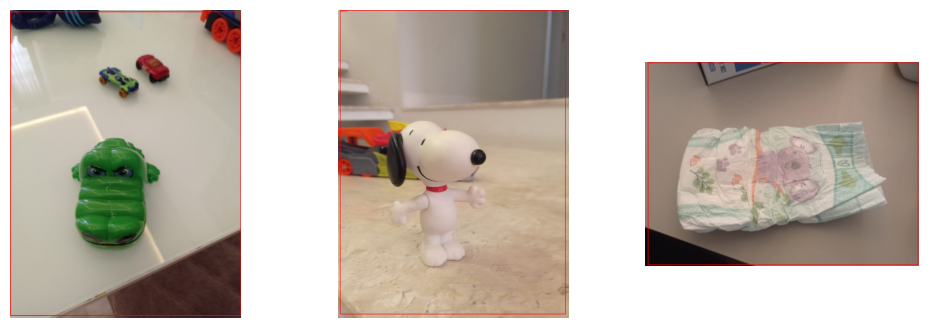

In [18]:
# Visual check: mostra 3 imagens com as boxes desenhadas
import os, random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
IMG_DIR = os.path.join(BASE, 'images', 'train')
LBL_DIR = os.path.join(BASE, 'labels', 'train')

def draw_yolo_boxes(img_path, txt_path, names=['objeto_A','objeto_B']):
    img = Image.open(img_path).convert('RGB')
    w,h = img.size
    draw = ImageDraw.Draw(img)
    if os.path.exists(txt_path):
        with open(txt_path) as f:
            for l in f:
                parts = l.split()
                if len(parts)!=5:
                    continue
                cls,x_c,y_c,w_box,h_box = parts
                cls=int(cls); x_c,y_c,w_box,h_box = map(float,(x_c,y_c,w_box,h_box))
                x0=(x_c-w_box/2)*w; y0=(y_c-h_box/2)*h
                x1=(x_c+w_box/2)*w; y1=(y_c+h_box/2)*h
                draw.rectangle([x0,y0,x1,y1], outline='red', width=3)
                draw.text((max(0,x0), max(0,y0-12)), names[cls] if cls < len(names) else str(cls), fill='red')
    return img

imgs = sorted([f for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))])
sample = [f for f in imgs if os.path.exists(os.path.join(LBL_DIR, os.path.splitext(f)[0]+'.txt'))]
random.shuffle(sample)
sample = sample[:3]

if sample:
    plt.figure(figsize=(12,4))
    for i,im in enumerate(sample):
        img_path = os.path.join(IMG_DIR, im)
        txt_path = os.path.join(LBL_DIR, os.path.splitext(im)[0]+'.txt')
        plt.subplot(1,3,i+1); plt.imshow(draw_yolo_boxes(img_path, txt_path)); plt.axis('off')
    plt.show()
else:
    print('Nenhuma imagem com label encontrada para visualização.')



In [19]:
# confirma se a GPU está ativa e exibe memória
!nvidia-smi
import torch
print("PyTorch CUDA disponível:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "nenhum")


/bin/bash: line 1: nvidia-smi: command not found
PyTorch CUDA disponível: False
Device: nenhum


In [1]:
!nvidia-smi
import torch
print("PyTorch CUDA disponível:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))


Tue Oct 14 17:05:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5 /content/yolov5
%cd /content/yolov5
!pip install -r requirements.txt


/content
Cloning into '/content/yolov5'...
remote: Enumerating objects: 17608, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17608 (delta 7), reused 2 (delta 2), pack-reused 17593 (from 2)
Receiving objects: 100% (17608/17608), 16.82 MiB | 31.03 MiB/s, done.
Resolving deltas: 100% (11983/11983), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00


In [3]:
!sed -n '1,200p' /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/dataset.yaml


sed: can't read /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/dataset.yaml: No such file or directory


In [4]:
# >>> Verifica existência de dataset.yaml e, se necessário, cria um dataset.yaml consistente automaticamente.
import os, yaml

BASE_DRIVE = '/content/drive/MyDrive/Fase6_YOLO'
DATASETS_DIR = os.path.join(BASE_DRIVE, 'datasets')

print("Procurando em:", DATASETS_DIR)
if not os.path.exists(DATASETS_DIR):
    print("Pasta datasets não encontrada em", BASE_DRIVE)
    os.makedirs(DATASETS_DIR, exist_ok=True)
    print("Foi criada a pasta:", DATASETS_DIR)

# procura por qualquer dataset.yaml dentro de /content/drive/MyDrive/Fase6_YOLO
found = []
for root, dirs, files in os.walk(BASE_DRIVE):
    for f in files:
        if f.lower() == 'dataset.yaml' or f.lower() == 'dataset.yml':
            found.append(os.path.join(root, f))

if found:
    print("Encontrado dataset.yaml em:")
    for p in found:
        print(" -", p)
    print("\nConteúdo do primeiro encontrado:\n")
    print(open(found[0]).read())
else:
    print("Nenhum dataset.yaml encontrado. Vou criar um automaticamente em um dataset padrão.\n")
    # determina pasta de dataset: usa a primeira pasta dentro de datasets se existir
    candidate = None
    if os.path.isdir(DATASETS_DIR):
        sub = [d for d in os.listdir(DATASETS_DIR) if os.path.isdir(os.path.join(DATASETS_DIR,d))]
        if sub:
            candidate = os.path.join(DATASETS_DIR, sub[0])
            print("Usando dataset existente encontrado em:", candidate)
        else:
            # cria 'seu_dataset'
            candidate = os.path.join(DATASETS_DIR, 'seu_dataset')
            os.makedirs(candidate, exist_ok=True)
            print("Nenhum dataset dentro de datasets — foi criada a pasta:", candidate)

    # garante subpastas images/labels e train/val/test
    imgs_train = os.path.join(candidate, 'images', 'train')
    imgs_val   = os.path.join(candidate, 'images', 'val')
    imgs_test  = os.path.join(candidate, 'images', 'test')
    lbls_train = os.path.join(candidate, 'labels', 'train')
    lbls_val   = os.path.join(candidate, 'labels', 'val')
    lbls_test  = os.path.join(candidate, 'labels', 'test')
    for p in [imgs_train, imgs_val, imgs_test, lbls_train, lbls_val, lbls_test]:
        os.makedirs(p, exist_ok=True)

    # tenta detectar classes a partir de labels/train
    label_files = sorted([f for f in os.listdir(lbls_train) if f.lower().endswith('.txt')]) if os.path.exists(lbls_train) else []
    classes = set()
    for f in label_files:
        try:
            with open(os.path.join(lbls_train, f), 'r') as fh:
                for line in fh:
                    parts = line.strip().split()
                    if parts:
                        classes.add(int(parts[0]))
        except Exception as e:
            print("Aviso lendo", f, "->", e)
    if classes:
        maxc = max(classes)
        nc = maxc + 1
        names = [f'objeto_{chr(ord("A")+i)}' for i in range(nc)]
    else:
        # fallback: 2 classes (mude depois se necessário)
        nc = 2
        names = ['objeto_A','objeto_B']

    dataset_yaml_path = os.path.join(candidate, 'dataset.yaml')
    dataset = {
        'train': imgs_train,
        'val': imgs_val,
        'test': imgs_test,
        'nc': nc,
        'names': names
    }
    with open(dataset_yaml_path, 'w') as f:
        yaml.dump(dataset, f, default_flow_style=False, sort_keys=False, allow_unicode=True)
    print("dataset.yaml criado em:", dataset_yaml_path)
    print("\nConteúdo criado:\n")
    print(open(dataset_yaml_path).read())

print("\nFIM. Se o caminho criado/selecionado não for o dataset que você está usando, me diga o caminho correto ou mova seus arquivos para a pasta mostrada.")


Procurando em: /content/drive/MyDrive/Fase6_YOLO/datasets
Pasta datasets não encontrada em /content/drive/MyDrive/Fase6_YOLO
Foi criada a pasta: /content/drive/MyDrive/Fase6_YOLO/datasets
Nenhum dataset.yaml encontrado. Vou criar um automaticamente em um dataset padrão.

Nenhum dataset dentro de datasets — foi criada a pasta: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset
dataset.yaml criado em: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/dataset.yaml

Conteúdo criado:

train: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train
val: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/val
test: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test
nc: 2
names:
- objeto_A
- objeto_B


FIM. Se o caminho criado/selecionado não for o dataset que você está usando, me diga o caminho correto ou mova seus arquivos para a pasta mostrada.


In [5]:
import os
base = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
subs = ['images/train','images/val','images/test','labels/train','labels/val','labels/test']

for s in subs:
    p = os.path.join(base, s)
    if os.path.exists(p):
        files = os.listdir(p)
        print(f'{s}: {len(files)} arquivos')
        print(sorted(files)[:10])   # mostra até 10 nomes como amostra
    else:
        print(f'{s}: NÃO EXISTE')


images/train: 0 arquivos
[]
images/val: 0 arquivos
[]
images/test: 0 arquivos
[]
labels/train: 0 arquivos
[]
labels/val: 0 arquivos
[]
labels/test: 0 arquivos
[]


In [6]:
# >>> localizar e copiar automaticamente imagens/labels para seu_dataset (execute uma vez)
import os, glob, shutil
from collections import defaultdict

ROOT = '/content/drive/MyDrive'
TARGET_BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
DST_IMGS = os.path.join(TARGET_BASE, 'images', 'train')
DST_LBLS = os.path.join(TARGET_BASE, 'labels', 'train')
os.makedirs(DST_IMGS, exist_ok=True)
os.makedirs(DST_LBLS, exist_ok=True)

# 1) procurar pastas que contenham imagens e contar .txt
candidates = []
for root, dirs, files in os.walk(ROOT):
    imgs = [f for f in files if f.lower().endswith(('.jpg','.jpeg','.png'))]
    txts = [f for f in files if f.lower().endswith('.txt')]
    if imgs or txts:
        candidates.append((root, len(imgs), len(txts)))

# ordenar por maior número de imagens
candidates.sort(key=lambda x:(-x[1], -x[2]))

print("Top 10 pastas encontradas com imagens/labels (path, #imgs, #txts):")
for i,(p,ni,nt) in enumerate(candidates[:10],1):
    print(f"{i}. {p}  —  images: {ni}, txt: {nt}")

# 2) se existir pasta com >=40 imagens, copiar automaticamente a melhor
auto_done = False
if candidates:
    best_path, best_imgs, best_txts = candidates[0]
    if best_imgs >= 40:
        print(f"\nPasta candidata com >=40 imagens encontrada (auto-copy): {best_path} — {best_imgs} imgs, {best_txts} txts")
        # copiar imagens
        for ext in ('*.jpg','*.jpeg','*.png'):
            for f in glob.glob(os.path.join(best_path, ext)):
                shutil.copy(f, DST_IMGS)
        # copiar .txt correspondentes (ou todos .txt)
        for f in glob.glob(os.path.join(best_path, '*.txt')):
            shutil.copy(f, DST_LBLS)
        print("Cópia automática concluída.")
        print("images/train:", len(os.listdir(DST_IMGS)))
        print("labels/train:", len(os.listdir(DST_LBLS)))
        auto_done = True

if not auto_done:
    print("\nNenhuma pasta com >=40 imagens encontrada automaticamente.")
    if candidates:
        print("Escolha manualmente uma das pastas acima (por índice).")
        print("Se preferir que eu copie automaticamente a melhor candidata mesmo assim, responda aqui com: copiar 1")
    else:
        print("Não foram encontradas pastas com imagens no seu MyDrive. Verifique onde fez upload das imagens e me informe o caminho, ou faça o upload agora para o Drive.")


Top 10 pastas encontradas com imagens/labels (path, #imgs, #txts):

Nenhuma pasta com >=40 imagens encontrada automaticamente.
Não foram encontradas pastas com imagens no seu MyDrive. Verifique onde fez upload das imagens e me informe o caminho, ou faça o upload agora para o Drive.


In [8]:
!ls /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train

In [9]:
# Verificação completa do dataset YOLO (contagens, pareamento e formato das labels)
import os, glob
from pathlib import Path

BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
paths = {
    'images/train': os.path.join(BASE,'images','train'),
    'images/val'  : os.path.join(BASE,'images','val'),
    'images/test' : os.path.join(BASE,'images','test'),
    'labels/train' : os.path.join(BASE,


SyntaxError: incomplete input (ipython-input-2080394102.py, line 10)

In [11]:
# Verificação completa do dataset YOLO (contagens, pareamento e formato das labels)
import os, glob
from pathlib import Path

BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
paths = {
    'images/train': os.path.join(BASE,'images','train'),
    'images/val'  : os.path.join(BASE,'images','val'),
    'images/test' : os.path.join(BASE,'images','test'),
    'labels/train': os.path.join(BASE,'labels','train'),
    'labels/val'  : os.path.join(BASE,'labels','val'),
    'labels/test' : os.path.join(BASE,'labels','test'),
}

# 1) contagens e amostras
print("=== Contagem por pasta e amostras (até 10) ===")
for k,p in paths.items():
    if os.path.exists(p):
        files = os.listdir(p)
        print(f'{k}: {len(files)} arquivos')
        print(sorted(files)[:10])   # mostra até 10 nomes como amostra
    else:
        print(f'{k}: NÃO EXISTE')

# 2) pareamento imagem/label
print("\n=== Pareamento Imagem/Label (sempre bom ter 1:1) ===")
for split in ['train','val','test']:
    img_dir = paths[f'images/{split}']
    lbl_dir = paths[f'labels/{split}']
    if os.path.exists(img_dir) and os.path.exists(lbl_dir):
        imgs = sorted([os.path.splitext(f)[0] for f in os.listdir(img_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))])
        lbls = sorted([os.path.splitext(f)[0] for f in os.listdir(lbl_dir) if f.lower().endswith('.txt')])
        imgs_set = set(imgs)
        lbls_set = set(lbls)

        imgs_without_label = [f+'.'+[im for im in os.listdir(img_dir) if os.path.splitext(im)[0]==f][0].split('.')[-1] for f in imgs_set - lbls_set]
        labels_without_img = [f+'.txt' for f in lbls_set - imgs_set]

        print(f'{split}:')
        print(f'  Imagens: {len(imgs)}, Labels: {len(lbls)}')
        if imgs_without_label:
            print(f'  Imagens sem label ({len(imgs_without_label)}): {imgs_without_label[:10]}')
        if labels_without_img:
            print(f'  Labels sem imagem ({len(labels_without_img)}): {labels_without_img[:10]}')
        if not imgs_without_label and not labels_without_img:
            print('  Pareamento OK.')
    else:
        print(f'{split}: pastas images ou labels não encontradas.')

# 3) verifica formato das labels (primeiras 5 labels com conteúdo)
print("\n=== Verificação do formato das Labels (primeiras 5 com conteúdo) ===")
checked_count = 0
for split in ['train','val','test']:
    lbl_dir = paths[f'labels/{split}']
    if os.path.exists(lbl_dir):
        for lbl_file in sorted(os.listdir(lbl_dir)):
            if lbl_file.lower().endswith('.txt'):
                lbl_path = os.path.join(lbl_dir, lbl_file)
                try:
                    with open(lbl_path, 'r') as f:
                        content = f.read().strip()
                        if content:
                            print(f'{split}/{lbl_file}:')
                            lines = content.split('\n')
                            for i,line in enumerate(lines[:5]): # verifica até 5 linhas por arquivo
                                parts = line.split()
                                if len(parts) != 5:
                                    print(f'  Linha {i+1}: Formato inválido (esperado 5 valores, encontrado {len(parts)}): {line}')
                                else:
                                    try:
                                        cls = int(parts[0])
                                        coords = [float(p) for p in parts[1:]]
                                        if not all(0 <= c <= 1 for c in coords):
                                            print(f'  Linha {i+1}: Coordenadas fora do intervalo [0, 1]: {line}')
                                        # print(f'  Linha {i+1}: OK') # descomente para ver linhas OK
                                    except ValueError:
                                        print(f'  Linha {i+1}: Valores não numéricos após a classe: {line}')
                            checked_count += 1
                            if checked_count >= 5: break # para após verificar 5 arquivos com conteúdo
                except Exception as e:
                    print(f'Erro lendo {split}/{lbl_file}: {e}')
    if checked_count >= 5: break # para após verificar 5 arquivos com conteúdo

if checked_count == 0:
    print("Nenhum arquivo de label com conteúdo encontrado.")

=== Contagem por pasta e amostras (até 10) ===
images/train: 0 arquivos
[]
images/val: 0 arquivos
[]
images/test: 0 arquivos
[]
labels/train: 0 arquivos
[]
labels/val: 0 arquivos
[]
labels/test: 0 arquivos
[]

=== Pareamento Imagem/Label (sempre bom ter 1:1) ===
train:
  Imagens: 0, Labels: 0
  Pareamento OK.
val:
  Imagens: 0, Labels: 0
  Pareamento OK.
test:
  Imagens: 0, Labels: 0
  Pareamento OK.

=== Verificação do formato das Labels (primeiras 5 com conteúdo) ===
Nenhum arquivo de label com conteúdo encontrado.


In [13]:
!ls /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train
!ls /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train

In [14]:
from google.colab import files
import os, zipfile, glob, shutil

ROOT_DRIVE = '/content/drive/MyDrive'
TARGET_BASE = os.path.join(ROOT_DRIVE, 'Fase6_YOLO', 'datasets', 'seu_dataset')
DST_IMGS = os.path.join(TARGET_BASE, 'images', 'train')
DST_LBLS = os.path.join(TARGET_BASE, 'labels', 'train')
os.makedirs(DST_IMGS, exist_ok=True)
os.makedirs(DST_LBLS, exist_ok=True)

print("Selecione o(s) arquivo(s) para upload (ZIP recomendado).")
uploaded = files.upload()  # abre seletor

workdir = '/content/_uploaded_files'
os.makedirs(workdir, exist_ok=True)
for fname, data in uploaded.items():
    with open(os.path.join(workdir, fname), 'wb') as f:
        f.write(data)

# extrair zips se houver
for f in os.listdir(workdir):
    if f.lower().endswith('.zip'):
        with zipfile.ZipFile(os.path.join(workdir,f),'r') as z:
            z.extractall(workdir)
        print("Extraído:", f)

# copiar imagens e txts para Drive
imgs_copied = txts_copied = 0
for root, _, files in os.walk(workdir):
    for fname in files:
        low = fname.lower()
        src = os.path.join(root, fname)
        if low.endswith(('.jpg','.jpeg','.png')):
            shutil.copy(src, os.path.join(DST_IMGS, fname)); imgs_copied += 1
        elif low.endswith('.txt'):
            shutil.copy(src, os.path.join(DST_LBLS, fname)); txts_copied += 1

print("Cópia completa.")
print("images/train:", imgs_copied, "->", DST_IMGS)
print("labels/train:", txts_copied, "->", DST_LBLS)
print("Amostra images/train:", sorted(os.listdir(DST_IMGS))[:10])
print("Amostra labels/train:", sorted(os.listdir(DST_LBLS))[:10])


Selecione o(s) arquivo(s) para upload (ZIP recomendado).


Saving drive-download-20251014T143555Z-1-001.zip to drive-download-20251014T143555Z-1-001.zip
Extraído: drive-download-20251014T143555Z-1-001.zip
Cópia completa.
images/train: 36 -> /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train
labels/train: 0 -> /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train
Amostra images/train: ['WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.08 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.08.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.09.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.11 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.11.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.13 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.13.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.15.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.16 (1).jpeg']
Amostra labels/train: []


In [15]:
# Procura .txt no Drive e copia (opcional) para labels/train
import os, glob, shutil

ROOT = '/content/drive/MyDrive'
DST_LBLS = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train'
os.makedirs(DST_LBLS, exist_ok=True)

# procurar pastas contendo txt
found = []
for root, dirs, files in os.walk(ROOT):
    txts = [f for f in files if f.lower().endswith('.txt')]
    imgs = [f for f in files if f.lower().endswith(('.jpg','.jpeg','.png'))]
    if txts:
        found.append((root, len(imgs), len(txts)))

found_sorted = sorted(found, key=lambda x:(-x[2], -x[1]))  # ordenar por mais txts
print("Pastas com .txt encontradas (top 20):")
for i,(p,ni,nt) in enumerate(found_sorted[:20],1):
    print(f"{i}. {p}  —  images: {ni}, txt: {nt}")

if not found_sorted:
    print("Nenhum .txt encontrado em /content/drive/MyDrive — talvez você exportou localmente no PC, não no Drive.")

# Se desejar copiar automaticamente do primeiro caminho listado:
if found_sorted:
    escolha = input("Deseja copiar os .txt da pasta #1 para labels/train? (s/n) ")
    if escolha.lower().startswith('s'):
        src = found_sorted[0][0]
        copied = 0
        for f in os.listdir(src):
            if f.lower().endswith('.txt'):
                shutil.copy(os.path.join(src,f), os.path.join(DST_LBLS,f))
                copied += 1
        print(f"{copied} arquivos .txt copiados para {DST_LBLS}")
    else:
        print("OK — não copiado. Se quiser copiar de outra pasta, informe o índice que aparece acima.")


Pastas com .txt encontradas (top 20):
Nenhum .txt encontrado em /content/drive/MyDrive — talvez você exportou localmente no PC, não no Drive.


In [17]:
# Upload de labels (.txt) do seu PC para a pasta labels/train no Drive
from google.colab import files
import os, zipfile, shutil

DST_LBLS = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train'
os.makedirs(DST_LBLS, exist_ok=True)

print("Selecione os arquivos .txt (segure Ctrl/Cmd para selecionar múltiplos) ou um ZIP contendo os .txt")
uploaded = files.upload()  # abre seletor de arquivos do PC

workdir = '/content/_uploaded_labels'
os.makedirs(workdir, exist_ok=True)

# salvar uploads temporariamente
for fname, data in uploaded.items():
    path = os.path.join(workdir, fname)
    with open(path, 'wb') as f:
        f.write(data)
    print("Salvo temporariamente:", fname)

# se houver ZIPs, extrair
for fname in os.listdir(workdir):
    if fname.lower().endswith('.zip'):
        zip_path = os.path.join(workdir, fname)
        try:
            with zipfile.ZipFile(zip_path, 'r') as z:
                z.extractall(workdir)
            print("Extraído:", fname)
        except zipfile.BadZipFile:
            print(f"Aviso: {fname} não é um arquivo ZIP válido.")

# copiar .txt extraídos ou diretos para o Drive
txt_copied = 0
for root, _, files in os.walk(workdir):
    for fname in files:
        if fname.lower().endswith('.txt'):
            src_path = os.path.join(root, fname)
            dst_path = os.path.join(DST_LBLS, fname)
            try:
                shutil.copy(src_path, dst_path)
                txt_copied += 1
            except Exception as e:
                print(f"Erro ao copiar {fname}: {e}")

print(f"\nCópia completa. Total de {txt_copied} arquivos .txt copiados para {DST_LBLS}")

# limpar pasta temporária
shutil.rmtree(workdir)
print("Pasta temporária removida:", workdir)

Selecione os arquivos .txt (segure Ctrl/Cmd para selecionar múltiplos) ou um ZIP contendo os .txt


Saving WhatsApp Image 2025-10-10 at 14.22.08 (1).txt to WhatsApp Image 2025-10-10 at 14.22.08 (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.08 (2).txt to WhatsApp Image 2025-10-10 at 14.22.08 (2).txt
Saving WhatsApp Image 2025-10-10 at 14.22.08.txt to WhatsApp Image 2025-10-10 at 14.22.08.txt
Saving WhatsApp Image 2025-10-10 at 14.22.09.txt to WhatsApp Image 2025-10-10 at 14.22.09.txt
Saving WhatsApp Image 2025-10-10 at 14.22.11 (1).txt to WhatsApp Image 2025-10-10 at 14.22.11 (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.11.txt to WhatsApp Image 2025-10-10 at 14.22.11.txt
Saving WhatsApp Image 2025-10-10 at 14.22.13 (1).txt to WhatsApp Image 2025-10-10 at 14.22.13 (1).txt
Saving WhatsApp Image 2025-10-10 at 14.22.13.txt to WhatsApp Image 2025-10-10 at 14.22.13.txt
Saving WhatsApp Image 2025-10-10 at 14.22.15.txt to WhatsApp Image 2025-10-10 at 14.22.15.txt
Saving WhatsApp Image 2025-10-10 at 14.22.16 (1).txt to WhatsApp Image 2025-10-10 at 14.22.16 (1).txt
Saving WhatsApp Imag

In [19]:
# Verificação final pós-upload (contagens, pareamento e formato)
import os, glob
from pathlib import Path

BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
splits = ['train','val','test']

def basename_noext(fname): return os.path.splitext(fname)[0]

print("Dataset base:", BASE)
print("---- Contagens por pasta ----")
for s in splits:
    imgdir = os.path.join(BASE,'images',s)
    lbldir = os.path.join(BASE,'labels',s)
    nimg = len([f for f in os.listdir(imgdir) if f.lower().endswith(('.jpg','.jpeg','.png'))]) if os.path.exists(imgdir) else 0
    ntxt = len([f for f in os.listdir(lbldir) if f.lower().endswith('.txt')]) if os.path.exists(lbldir) else 0
    print(f" {s}: images={nimg:3d} | labels={ntxt:3d}  -> {imgdir} / {lbldir}")

print("\n---- Pareamento imagem <-> label (nomes base) ----")
for s in splits:
    imgdir = os.path.join(BASE,'images',s)
    lbldir = os.path.join(BASE,'labels',s)
    imgs = sorted([f for f in os.listdir(imgdir) if f.lower().endswith(('.jpg','.jpeg','.png'))]) if os.path.exists(imgdir) else []
    lbls = sorted([f for f in os.listdir(lbldir) if f.lower().endswith('.txt')]) if os.path.exists(lbldir) else []

    imgs_basenames = set([basename_noext(f) for f in imgs])
    lbls_basenames = set([basename_noext(f) for f in lbls])

    imgs_without_label = [f for f in imgs if basename_noext(f) not in lbls_basenames]
    labels_without_img = [f for f in lbls if basename_noext(f) not in imgs_basenames]

    print(f" {s}:")
    print(f"  {len(imgs)} images, {len(lbls)} labels")
    if imgs_without_label:
        print(f"  Imagens sem label ({len(imgs_without_label)}): {imgs_without_label[:10]}")
    if labels_without_img:
        print(f"  Labels sem imagem ({len(labels_without_img)}): {labels_without_img[:10]}")
    if not imgs_without_label and not labels_without_img and imgs and lbls:
        print("  Pareamento OK (1:1)")
    elif not imgs and not lbls:
        print("  Ambas as pastas estão vazias.")
    else:
        print("  Pareamento incompleto.")


print("\n---- Verificação do formato das Labels (primeiras 5 com conteúdo) ----")
checked_count = 0
for s in splits:
    lbldir = os.path.join(BASE,'labels',s)
    if os.path.exists(lbldir):
        for lbl_file in sorted(os.listdir(lbldir)):
            if lbl_file.lower().endswith('.txt'):
                lbl_path = os.path.join(lbldir, lbl_file)
                try:
                    with open(lbl_path, 'r') as f:
                        content = f.read().strip()
                        if content:
                            print(f' {s}/{lbl_file}:')
                            lines = content.split('\n')
                            valid_file = True
                            for i,line in enumerate(lines[:5]): # verifica até 5 linhas por arquivo
                                parts = line.split()
                                if len(parts) != 5:
                                    print(f'  Linha {i+1}: Formato inválido (esperado 5 valores, encontrado {len(parts)}): {line}')
                                    valid_file = False
                                else:
                                    try:
                                        cls = int(parts[0])
                                        coords = [float(p) for p in parts[1:]]
                                        if not all(0 <= c <= 1 for c in coords):
                                            print(f'  Linha {i+1}: Coordenadas fora do intervalo [0, 1]: {line}')
                                            valid_file = False
                                        # print(f'  Linha {i+1}: OK') # descomente para ver linhas OK
                                    except ValueError:
                                        print(f'  Linha {i+1}: Valores não numéricos após a classe: {line}')
                                        valid_file = False
                            if valid_file:
                                print("  Formato OK (verificadas as primeiras 5 linhas com conteúdo)")
                            checked_count += 1
                            if checked_count >= 5: break # para após verificar 5 arquivos com conteúdo
                except Exception as e:
                    print(f' Erro lendo {s}/{lbl_file}: {e}')
    if checked_count >= 5: break # para após verificar 5 arquivos com conteúdo

if checked_count == 0:
    print(" Nenhum arquivo de label com conteúdo encontrado para verificação.")

Dataset base: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset
---- Contagens por pasta ----
 train: images= 36 | labels= 36  -> /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train / /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train
 val: images=  0 | labels=  0  -> /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/val / /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/val
 test: images=  0 | labels=  0  -> /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test / /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/test

---- Pareamento imagem <-> label (nomes base) ----
 train:
  36 images, 36 labels
  Pareamento OK (1:1)
 val:
  0 images, 0 labels
  Ambas as pastas estão vazias.
 test:
  0 images, 0 labels
  Ambas as pastas estão vazias.

---- Verificação do formato das Labels (primeiras 5 com conteúdo) ----
 train/WhatsApp Image 2025-10-10 at 14.22.08 (1).txt:
  Formato OK (verificadas as primeiras

In [21]:
# === 1) criar splits val/test automaticamente e gerar dataset.yaml ===
import os, random, shutil, math
from collections import defaultdict
import yaml # Importando a biblioteca yaml

BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
IMG_TRAIN = os.path.join(BASE, 'images', 'train')
LBL_TRAIN = os.path.join(BASE, 'labels', 'train')
IMG_VAL   = os.path.join(BASE, 'images', 'val')
LBL_VAL   = os.path.join(BASE, 'labels', 'val')
IMG_TEST  = os.path.join(BASE, 'images', 'test')
LBL_TEST  = os.path.join(BASE, 'labels', 'test')

for p in [IMG_VAL, LBL_VAL, IMG_TEST, LBL_TEST]:
    os.makedirs(p, exist_ok=True)

def list_imgs(path):
    return sorted([f for f in os.listdir(path) if f.lower().endswith(('.jpg','.jpeg','.png'))])

imgs = list_imgs(IMG_TRAIN)
print("Imagens em train (antes):", len(imgs))

# map image base -> classes present
img_classes = {}
classes_set = set()
for img in imgs:
    base = os.path.splitext(img)[0]
    lbl = base + '.txt'
    lbl_path = os.path.join(LBL_TRAIN, lbl)
    cls_list = []
    if os.path.exists(lbl_path):
        with open(lbl_path, 'r') as f: # Corrected: Open the label file
            for line in f:
                parts = line.strip().split()
                if len(parts) > 0:
                    try:
                        cls = int(parts[0])
                        cls_list.append(cls)
                        classes_set.add(cls)
                    except ValueError:
                        print(f"Warning: Could not parse class in file {lbl_path}, line: {line.strip()}")
    img_classes[base] = cls_list

all_items = sorted(img_classes.keys())
random.seed(42)
random.shuffle(all_items)

# Distribute based on number of items, trying to keep class distribution roughly similar
# Simple split for now, could be improved with stratified split
total_items = len(all_items)
n_val = math.ceil(total_items * 0.1) # 10% for validation
n_test = math.ceil(total_items * 0.1) # 10% for test
n_train = total_items - n_val - n_test

train_items = all_items[:n_train]
val_items = all_items[n_train : n_train + n_val]
test_items = all_items[n_train + n_val :]

print(f"\nTotal items: {total_items}, Train: {len(train_items)}, Val: {len(val_items)}, Test: {len(test_items)}")

# Function to copy files
def copy_files(item_list, src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    copied_img = 0
    copied_lbl = 0
    for item_base in item_list:
        # Find image file (handle different extensions)
        img_src = None
        for ext in ('.jpg', '.jpeg', '.png'):
            candidate = os.path.join(src_img_dir, item_base + ext)
            if os.path.exists(candidate):
                img_src = candidate
                break
        if img_src:
            shutil.copy(img_src, os.path.join(dst_img_dir, os.path.basename(img_src)))
            copied_img += 1

        # Copy label file
        lbl_src = os.path.join(src_lbl_dir, item_base + '.txt')
        if os.path.exists(lbl_src):
            shutil.copy(lbl_src, os.path.join(dst_lbl_dir, os.path.basename(lbl_src)))
            copied_lbl += 1
        elif img_src:
             print(f"Warning: Label file not found for image {os.path.basename(img_src)}")


print("\nCopying files to splits...")
# Clear existing files in val/test before copying
for p in [IMG_VAL, LBL_VAL, IMG_TEST, LBL_TEST]:
    if os.path.exists(p):
        for f in os.listdir(p):
            os.remove(os.path.join(p,f))

# Copy files to train, val, test
copy_files(train_items, IMG_TRAIN, LBL_TRAIN, IMG_TRAIN, LBL_TRAIN) # Copying to train (essentially a self-copy after shuffling)
copy_files(val_items, IMG_TRAIN, LBL_TRAIN, IMG_VAL, LBL_VAL)
copy_files(test_items, IMG_TRAIN, LBL_TRAIN, IMG_TEST, LBL_TEST)

print("\nFiles copied.")
print("Images in train:", len(os.listdir(IMG_TRAIN)))
print("Labels in train:", len(os.listdir(LBL_TRAIN)))
print("Images in val:", len(os.listdir(IMG_VAL)))
print("Labels in val:", len(os.listdir(LBL_VAL)))
print("Images in test:", len(os.listdir(IMG_TEST)))
print("Labels in test:", len(os.listdir(LBL_TEST)))

# Generate dataset.yaml
max_class = max(classes_set) if classes_set else -1
class_names = [f'objeto_{chr(ord("A")+i)}' for i in range(max_class+1)] if max_class>=0 else []

dataset_yaml = {
    'train': IMG_TRAIN,
    'val': IMG_VAL,
    'test': IMG_TEST,
    'nc': len(class_names),
    'names': class_names
}
yaml_path = os.path.join(BASE, 'dataset.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(dataset_yaml, f, default_flow_style=False, sort_keys=False, allow_unicode=True)
print('\ndataset.yaml created at:', yaml_path)
print('Content:\n', open(yaml_path).read())

Imagens em train (antes): 36

Total items: 36, Train: 28, Val: 4, Test: 4

Copying files to splits...


SameFileError: '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.16.jpeg' and '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.16.jpeg' are the same file

In [22]:
# Correção segura: mover imagens para val/test sem causar SameFileError
import os, random, shutil, math
from collections import defaultdict

BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
IMG_TRAIN = os.path.join(BASE, 'images', 'train')
LBL_TRAIN = os.path.join(BASE, 'labels', 'train')
IMG_VAL   = os.path.join(BASE, 'images', 'val')
LBL_VAL   = os.path.join(BASE, 'labels', 'val')
IMG_TEST  = os.path.join(BASE, 'images', 'test')
LBL_TEST  = os.path.join(BASE, 'labels', 'test')

for p in [IMG_VAL, LBL_VAL, IMG_TEST, LBL_TEST]:
    os.makedirs(p, exist_ok=True)

def list_imgs(path):
    return sorted([f for f in os.listdir(path) if f.lower().endswith(('.jpg','.jpeg','.png'))]) if os.path.exists(path) else []

def basename_noext(fname): return os.path.splitext(fname)[0]

# contagens iniciais
print("Contagens iniciais:")
print(" train images:", len(list_imgs(IMG_TRAIN)), " labels:", len([f for f in os.listdir(LBL_TRAIN) if f.lower().endswith('.txt')]) if os.path.exists(LBL_TRAIN) else 0)
print(" val   images:", len(list_imgs(IMG_VAL)),   " labels:", len([f for f in os.listdir(LBL_VAL) if f.lower().endswith('.txt')]) if os.path.exists(LBL_VAL) else 0)
print(" test  images:", len(list_imgs(IMG_TEST)),  " labels:", len([f for f in os.listdir(LBL_TEST) if f.lower().endswith('.txt')]) if os.path.exists(LBL_TEST) else 0)

# map image->classes lendo labels já existentes em train/val/test
img_classes = defaultdict(list)
classes_set = set()
for lbl_dir in [LBL_TRAIN, LBL_VAL, LBL_TEST]:
    if not os.path.exists(lbl_dir):
        continue
    for f in os.listdir(lbl_dir):
        if not f.lower().endswith('.txt'): continue
        base = basename_noext(f)
        p = os.path.join(lbl_dir, f)
        with open(p, 'r', encoding='utf-8') as fh:
            for ln in fh:
                ln = ln.strip()
                if not ln:
                    continue
                parts = ln.split()
                try:
                    c = int(float(parts[0]))
                    img_classes[base].append(c)
                    classes_set.add(c)
                except:
                    pass

# Apenas considerar imagens que ainda estão em train (não nas pastas val/test)
train_imgs = set(list_imgs(IMG_TRAIN))
val_imgs   = set(list_imgs(IMG_VAL))
test_imgs  = set(list_imgs(IMG_TEST))
available_train_imgs = sorted(list(train_imgs - val_imgs - test_imgs))

# construir per-class list apenas com imagens disponíveis em train
from collections import defaultdict
per_class = defaultdict(list)
for img in available_train_imgs:
    base = basename_noext(img)
    cls_list = img_classes.get(base, [])
    if not cls_list:
        per_class[-1].append(img)
    else:
        for c in cls_list:
            per_class[c].append(img)

random.seed(42)
to_move_val = set()
to_move_test = set()

# lógica de escolha por classe (robusta)
for c, lst in per_class.items():
    if c == -1:
        continue
    lst_unique = sorted(list(set(lst)))
    random.shuffle(lst_unique)
    n = len(lst_unique)
    if n == 0:
        continue
    if n >= 8:
        nv = min(4, n//2)
        nt = min(4, n - nv)
    else:
        nv = max(1, math.ceil(n * 0.20))
        nt = max(1, math.ceil(n * 0.10))
        if nv + nt >= n:
            nv = max(1, n-2)
            nt = max(1, n - nv)
    # escolher sem conflito
    picked = 0; idx = 0
    while picked < nv and idx < len(lst_unique):
        candidate = lst_unique[idx]
        if candidate not in to_move_val and candidate not in to_move_test:
            to_move_val.add(candidate); picked += 1
        idx += 1
    picked = 0; idx = 0
    while picked < nt and idx < len(lst_unique):
        candidate = lst_unique[idx]
        if candidate not in to_move_val and candidate not in to_move_test:
            to_move_test.add(candidate); picked += 1
        idx += 1

# distribuir alguns sem classe se necessário
unlabeled = per_class.get(-1, [])
random.shuffle(unlabeled)
for u in unlabeled:
    if len(to_move_val) < max(1, len(available_train_imgs)//10):
        to_move_val.add(u)
    elif len(to_move_test) < max(1, len(available_train_imgs)//20):
        to_move_test.add(u)

# função segura de mover (evita samefile/overwrite)
def safe_move(img_name, src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    src_img = os.path.join(src_img_dir, img_name)
    dst_img = os.path.join(dst_img_dir, img_name)
    base = basename_noext(img_name)
    src_lbl = os.path.join(src_lbl_dir, base + '.txt')
    dst_lbl = os.path.join(dst_lbl_dir, base + '.txt')
    # se arquivo já existe no destino, pula
    if os.path.exists(dst_img):
        # já está no destino
        return False, "exists_dst"
    # se src == dst (caminhos iguais), pula
    if os.path.abspath(src_img) == os.path.abspath(dst_img):
        return False, "samefile"
    # mover imagem
    if os.path.exists(src_img):
        shutil.move(src_img, dst_img)
    else:
        return False, "no_src_img"
    # mover label se existir
    if os.path.exists(src_lbl):
        shutil.move(src_lbl, dst_lbl)
    return True, "moved"

moved_val = moved_test = 0
moved_examples_val = []
moved_examples_test = []

for img in sorted(to_move_val):
    ok, reason = safe_move(img, IMG_TRAIN, LBL_TRAIN, IMG_VAL, LBL_VAL)
    if ok:
        moved_val += 1
        moved_examples_val.append(img)

for img in sorted(to_move_test):
    ok, reason = safe_move(img, IMG_TRAIN, LBL_TRAIN, IMG_TEST, LBL_TEST)
    if ok:
        moved_test += 1
        moved_examples_test.append(img)

print(f"\nMovidos (com sucesso) -> val: {moved_val}, test: {moved_test}")
print("Exemplos movidos para val:", moved_examples_val[:10])
print("Exemplos movidos para test:", moved_examples_test[:10])

# contagens finais
def count_imgs(path): return len([f for f in os.listdir(path) if f.lower().endswith(('.jpg','.jpeg','.png'))]) if os.path.exists(path) else 0
def count_txts(path): return len([f for f in os.listdir(path) if f.lower().endswith('.txt')]) if os.path.exists(path) else 0

print("\nContagens FINAIS:")
print(" train images:", count_imgs(IMG_TRAIN), " labels:", count_txts(LBL_TRAIN))
print(" val   images:", count_imgs(IMG_VAL),   " labels:", count_txts(LBL_VAL))
print(" test  images:", count_imgs(IMG_TEST),  " labels:", count_txts(LBL_TEST))


Contagens iniciais:
 train images: 36  labels: 36
 val   images: 0  labels: 0
 test  images: 0  labels: 0

Movidos (com sucesso) -> val: 8, test: 8
Exemplos movidos para val: ['WhatsApp Image 2025-10-10 at 14.22.16 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.18 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.18.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.19.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.30.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.31 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.33 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.36.jpeg']
Exemplos movidos para test: ['WhatsApp Image 2025-10-10 at 14.22.08.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.16 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.17.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.24.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.34.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.35 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.35.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.36 (2).jpeg']

Contagens FINAIS:
 train image

In [23]:
# Verifica dataset.yaml atual e permite editar nomes
BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
yaml_path = f'{BASE}/dataset.yaml'

print("Caminho do YAML:", yaml_path)
print("Conteúdo atual:\n")
if os.path.exists(yaml_path):
    print(open(yaml_path,'r',encoding='utf-8').read())
else:
    print("Arquivo não encontrado em", yaml_path)

# --- Se quiser regravar com nomes legíveis, execute depois:
novo = True  # mude para False se não quiser sobrescrever
if novo:
    content = f"""path: {BASE}
train: images/train
val:   images/val
test:  images/test
nc: 2
names: ['objeto_A','objeto_B']
"""
    with open(yaml_path,'w',encoding='utf-8') as f:
        f.write(content)
    print("\nArquivo regravado com names ['objeto_A','objeto_B']\n")
    print(open(yaml_path,'r',encoding='utf-8').read())


Caminho do YAML: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/dataset.yaml
Conteúdo atual:

train: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train
val: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/val
test: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test
nc: 2
names:
- objeto_A
- objeto_B


Arquivo regravado com names ['objeto_A','objeto_B']

path: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset
train: images/train
val:   images/val
test:  images/test
nc: 2
names: ['objeto_A','objeto_B']



In [24]:
# confirma GPU
!nvidia-smi
python -c "import torch; print('PyTorch CUDA disponível:', torch.cuda.is_available()); print('Device:', torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'nenhum')"


SyntaxError: invalid syntax (ipython-input-697801507.py, line 3)

In [25]:
import torch

print('PyTorch CUDA disponível:', torch.cuda.is_available())
if torch.cuda.is_available():
    print('Device:', torch.cuda.get_device_name(0))
else:
    print('Device: nenhum')


PyTorch CUDA disponível: True
Device: Tesla T4


In [26]:
# 1) clona o repo
!git clone https://github.com/ultralytics/yolov5.git /content/yolov5
%cd /content/yolov5

# 2) instala dependências
!pip install -r requirements.txt


fatal: destination path '/content/yolov5' already exists and is not an empty directory.
/content/yolov5


In [27]:
# 1A — copie o dataset.yaml para o folder data do yolov5
%cd /content/yolov5
!cp /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/dataset.yaml data/fase6_dataset.yaml

# 1B — mostrar conteúdo (confirme que os paths apontam para o Drive)
!sed -n '1,200p' data/fase6_dataset.yaml


/content/yolov5
path: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset
train: images/train
val:   images/val
test:  images/test
nc: 2
names: ['objeto_A','objeto_B']


In [28]:
import os, glob
BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'

for rel in ['images/train','images/val','images/test','labels/train','labels/val','labels/test']:
    path = os.path.join(BASE, rel)
    files = sorted(glob.glob(os.path.join(path,'*')))
    print(f"{rel:15}: {len(files):3} arquivos  | amostra: {[os.path.basename(x) for x in files[:6]]}")


images/train   :  20 arquivos  | amostra: ['WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.08 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.09.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.11 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.11.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.13 (1).jpeg']
images/val     :   8 arquivos  | amostra: ['WhatsApp Image 2025-10-10 at 14.22.16 (2).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.18 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.18.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.19.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.30.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.31 (1).jpeg']
images/test    :   8 arquivos  | amostra: ['WhatsApp Image 2025-10-10 at 14.22.08.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.16 (1).jpeg', 'WhatsApp Image 2025-10-10 at 14.22.17.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.24.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.34.jpeg', 'WhatsApp Image 2025-10-10 at 14.22.35 (1).jpeg']
labels/

In [29]:
import glob
lbls = sorted(glob.glob('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/*.txt'))[:5]
for f in lbls:
    print('---', os.path.basename(f))
    print(open(f,'r',encoding='utf-8').read().strip(), '\n')


--- WhatsApp Image 2025-10-10 at 14.22.08 (1).txt
1 0.502088 0.500000 0.995824 1.000000 

--- WhatsApp Image 2025-10-10 at 14.22.08 (2).txt
1 0.497288 0.502500 0.981695 0.995000 

--- WhatsApp Image 2025-10-10 at 14.22.09.txt
0 0.503187 0.505000 0.988048 0.990000 

--- WhatsApp Image 2025-10-10 at 14.22.11 (1).txt
1 0.502950 0.501875 0.994100 0.996249 

--- WhatsApp Image 2025-10-10 at 14.22.11.txt
1 0.498061 0.498750 0.981333 0.987500 



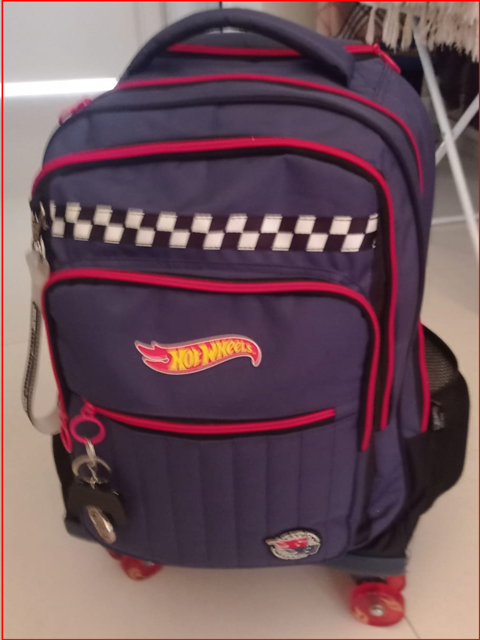

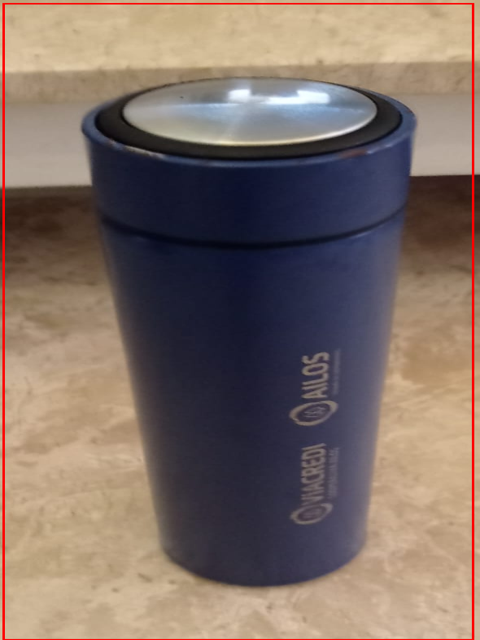

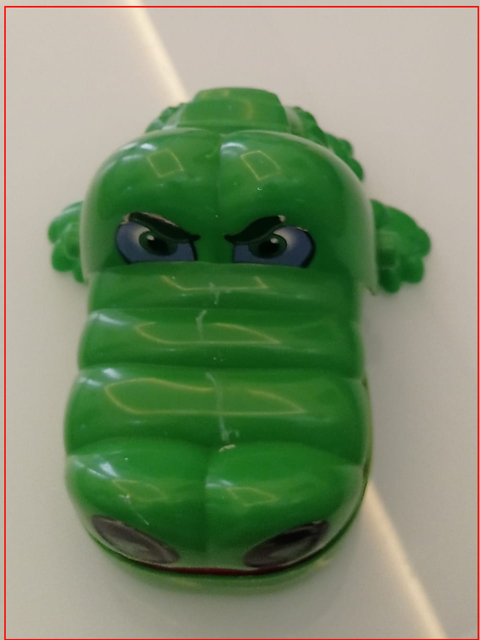

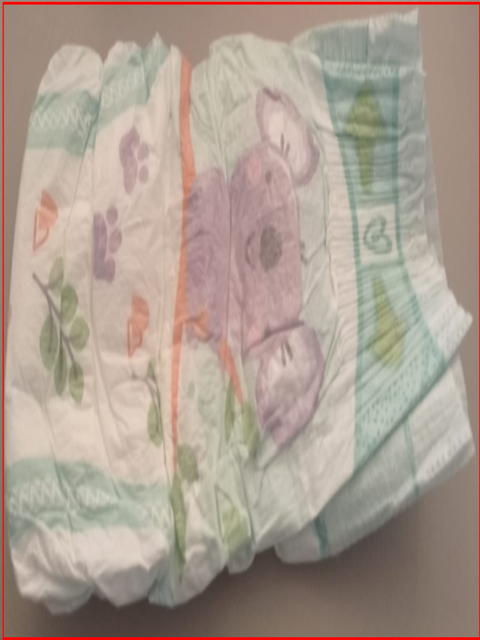

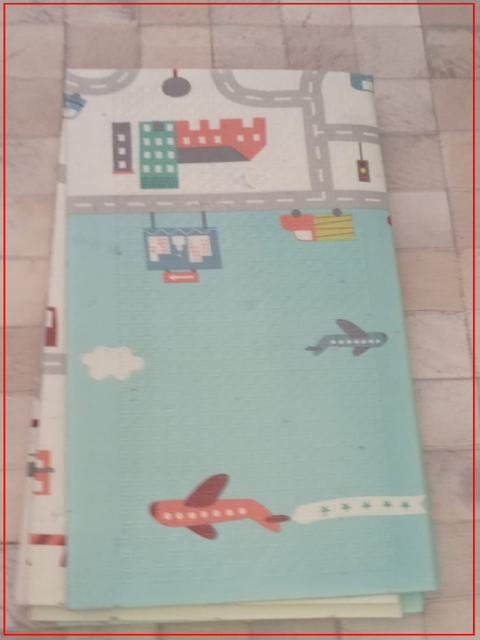

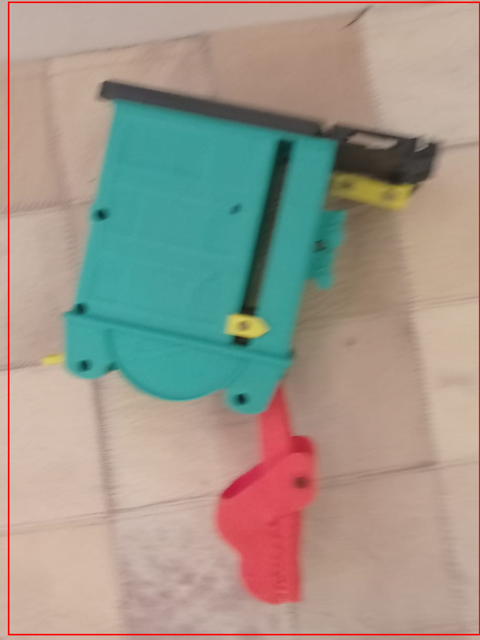

In [30]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

IMG_DIR = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train'
LBL_DIR = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train'
imgs = sorted([f for f in glob.glob(IMG_DIR+'/*')])[:6]

def draw_boxes(img_path, lbl_path):
    img = Image.open(img_path).convert('RGB')
    w,h = img.size
    draw = ImageDraw.Draw(img)
    for line in open(lbl_path,'r').read().splitlines():
        if not line.strip(): continue
        cls, xc, yc, ww, hh = map(float, line.split())
        x0 = (xc - ww/2)*w; x1 = (xc + ww/2)*w
        y0 = (yc - hh/2)*h; y1 = (yc + hh/2)*h
        draw.rectangle([x0,y0,x1,y1], outline='red', width=3)
    return img

for im in imgs:
    base = os.path.basename(im)
    lbl = os.path.join(LBL_DIR, os.path.splitext(base)[0] + '.txt')
    if os.path.exists(lbl):
        display(draw_boxes(im,lbl).resize((480,640)))
    else:
        display(Image.open(im).resize((480,640)))


In [31]:
%cd /content
# clonar yolov5 (se ainda não)
!git clone https://github.com/ultralytics/yolov5.git
%cd /content/yolov5
!pip install -r requirements.txt


/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [32]:
%cd /content/yolov5

!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 30 \
  --data /content/yolov5/data/fase6_dataset.yaml \
  --weights yolov5s.pt \
  --name fase6_run_30 \
  --project /content/drive/MyDrive/Fase6_YOLO/runs/train \
  --cache


/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-14 18:30:35.770570: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760466635.790807   21516 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760466635.796857   21516 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for 

In [33]:
%cd /content/yolov5
!python detect.py \
  --weights /content/drive/MyDrive/Fase6_YOLO/runs/train/fase6_run_30/weights/best.pt \
  --source /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test \
  --save-txt --save-conf \
  --project /content/drive/MyDrive/Fase6_YOLO/runs/detect \
  --name detect_fase6_run30


/content/yolov5
detect: weights=['/content/drive/MyDrive/Fase6_YOLO/runs/train/fase6_run_30/weights/best.pt'], source=/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Fase6_YOLO/runs/detect, name=detect_fase6_run30, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test/WhatsApp Image 2025-10-10 at 14.22.08.jpeg: 640x352 (no detections), 29.9ms
image 2/

In [34]:
# listar imagens de teste
!ls -la "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test" | sed -n '1,200p'

# listar labels de teste
!ls -la "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/test" | sed -n '1,200p'


total 472
drwxr-xr-x 2 root root  4096 Oct 14 17:54 .
drwxr-xr-x 5 root root  4096 Oct 14 17:11 ..
-rw-r--r-- 1 root root 59595 Oct 14 17:40 WhatsApp Image 2025-10-10 at 14.22.08.jpeg
-rw-r--r-- 1 root root 43900 Oct 14 17:40 WhatsApp Image 2025-10-10 at 14.22.16 (1).jpeg
-rw-r--r-- 1 root root 80256 Oct 14 17:40 WhatsApp Image 2025-10-10 at 14.22.17.jpeg
-rw-r--r-- 1 root root 52696 Oct 14 17:40 WhatsApp Image 2025-10-10 at 14.22.24.jpeg
-rw-r--r-- 1 root root 74525 Oct 14 17:40 WhatsApp Image 2025-10-10 at 14.22.34.jpeg
-rw-r--r-- 1 root root 46386 Oct 14 17:40 WhatsApp Image 2025-10-10 at 14.22.35 (1).jpeg
-rw-r--r-- 1 root root 50964 Oct 14 17:40 WhatsApp Image 2025-10-10 at 14.22.35.jpeg
-rw-r--r-- 1 root root 50897 Oct 14 17:40 WhatsApp Image 2025-10-10 at 14.22.36 (2).jpeg
total 40
drwxr-xr-x 2 root root 4096 Oct 14 17:54 .
drwxr-xr-x 5 root root 4096 Oct 14 18:31 ..
-rw-r--r-- 1 root root   37 Oct 14 17:46 WhatsApp Image 2025-10-10 at 14.22.08.txt
-rw-r--r-- 1 root root   37 Oc

In [35]:
# Mostra o nome dos 6 primeiros arquivos e o conteúdo
ls "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/test" | head -n 6 | while read f; do
  echo "---- $f ----"
  sed -n '1,10p' "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/test/$f"
done


SyntaxError: invalid syntax (ipython-input-1629760900.py, line 2)

In [36]:
import glob, os

LBL_DIR = "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/test"
files = sorted(glob.glob(os.path.join(LBL_DIR,"*.txt")))
print("Encontrados", len(files), "arquivos .txt em test. Mostrando até 6:\n")

for f in files[:6]:
    print("----", os.path.basename(f), "----")
    with open(f, 'r', encoding='utf-8') as fh:
        lines = fh.read().splitlines()
        if not lines:
            print("(arquivo vazio)")
        else:
            for i,ln in enumerate(lines[:10],1):
                print(f"{i}: {ln}")
    print()


Encontrados 8 arquivos .txt em test. Mostrando até 6:

---- WhatsApp Image 2025-10-10 at 14.22.08.txt ----
1: 1 0.506682 0.506250 0.986636 0.987500

---- WhatsApp Image 2025-10-10 at 14.22.16 (1).txt ----
1: 0 0.503273 0.500000 0.993453 0.985000

---- WhatsApp Image 2025-10-10 at 14.22.17.txt ----
1: 1 0.502560 0.505000 0.994880 0.970000

---- WhatsApp Image 2025-10-10 at 14.22.24.txt ----
1: 1 0.503738 0.501250 0.986906 0.987500

---- WhatsApp Image 2025-10-10 at 14.22.34.txt ----
1: 0 0.498131 0.501250 0.994175 0.987500

---- WhatsApp Image 2025-10-10 at 14.22.35 (1).txt ----
1: 0 0.502508 0.502500 0.994983 0.985000



In [37]:
# Checa se existem labels com problemas (fora de [0,1] ou <5 campos)
import glob, os

LBL_DIR = "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/test"
bad = []
for f in sorted(glob.glob(os.path.join(LBL_DIR,"*.txt"))):
    for i,line in enumerate(open(f,'r',encoding='utf-8').read().splitlines(),1):
        s=line.strip()
        if not s:
            continue
        parts = s.split()
        if len(parts) < 5:
            bad.append((os.path.basename(f), i, "menos de 5 campos"))
            break
        try:
            vals = list(map(float, parts[1:5]))
        except:
            bad.append((os.path.basename(f), i, "parse error"))
            break
        if any(v < 0 or v > 1 for v in vals):
            bad.append((os.path.basename(f), i, vals))
            break

print("Arquivos com problema (amostra até 20):", len(bad))
for t in bad[:20]:
    print(t)
if not bad:
    print("\nTudo OK: não foram encontrados valores fora de [0,1] nem linhas com menos de 5 campos.")


Arquivos com problema (amostra até 20): 0

Tudo OK: não foram encontrados valores fora de [0,1] nem linhas com menos de 5 campos.


In [ ]:

# ## 1. Conectar ao Google Drive e preparar o dataset

from google.colab import drive
import os, glob, shutil, random
from pathlib import Path

# Montar o Google Drive (será solicitado a autorização)
drive.mount('/content/drive')

# ====== CONFIGURAÇÕES ======
# Ajuste estes caminhos para as pastas no seu Drive contendo as imagens de cada classe
ORIGEM_IMAGENS_A = '/content/drive/MyDrive/SEU_CAMINHO/objeto_A_imagens'  # substitua
ORIGEM_IMAGENS_B = '/content/drive/MyDrive/SEU_CAMINHO/objeto_B_imagens'  # substitua
# Se já anotou com MakeSense e tem arquivos .txt YOLO, ajuste os caminhos das labels
ORIGEM_LABELS_A  = '/content/drive/MyDrive/SEU_CAMINHO/objeto_A_labels'   # ou deixe como '' se ainda não houver
ORIGEM_LABELS_B  = '/content/drive/MyDrive/SEU_CAMINHO/objeto_B_labels'   # ou deixe como '' se ainda não houver

# Nomes das classes
CLASSES = ['objeto_A', 'objeto_B']

# Quantidade mínima de imagens por classe (80 no total)
N_TRAIN = 32
N_VAL   = 4
N_TEST  = 4

# Criar estrutura de pastas do dataset
for p in ['dataset/images/train','dataset/images/val','dataset/images/test',
          'dataset/labels/train','dataset/labels/val','dataset/labels/test']:
    os.makedirs(p, exist_ok=True)

# Função para coletar imagens
def collect_images(path, patterns=('*.jpg','*.jpeg','*.png')):
    files = []
    for pat in patterns:
        files += glob.glob(os.path.join(path, '**', pat), recursive=True)
    return sorted(files)

# Coletar imagens de cada classe
imgs_A = collect_images(ORIGEM_IMAGENS_A)
imgs_B = collect_images(ORIGEM_IMAGENS_B)

print(f'Classe A: {len(imgs_A)} imagens, Classe B: {len(imgs_B)} imagens')
assert len(imgs_A) >= (N_TRAIN+N_VAL+N_TEST) and len(imgs_B) >= (N_TRAIN+N_VAL+N_TEST), 'Quantidade insuficiente de imagens para o mínimo exigido.'

# Embaralhar e separar imagens em treino, validação e teste
random.seed(42)
random.shuffle(imgs_A)
random.shuffle(imgs_B)

splits = {'train': N_TRAIN, 'val': N_VAL, 'test': N_TEST}

def distribute(images, labels_dir):
    offset = 0
    for split, qty in splits.items():
        part = images[offset:offset+qty]
        offset += qty
        for img in part:
            dest_img = f"dataset/images/{split}/" + os.path.basename(img)
            shutil.copy(img, dest_img)
            # copiar label correspondente, se existir
            if labels_dir:
                label_filename = os.path.splitext(os.path.basename(img))[0] + '.txt'
                label_path = os.path.join(labels_dir, label_filename)
                if os.path.exists(label_path):
                    shutil.copy(label_path, f"dataset/labels/{split}/" + label_filename)

# Distribuir imagens e (opcionalmente) labels
distribute(imgs_A, ORIGEM_LABELS_A)
distribute(imgs_B, ORIGEM_LABELS_B)

print('Imagens copiadas para dataset/images e labels (se houver).')

# Gerar arquivo dataset.yaml para YOLOv5
yaml_content = f'# Dataset personalizado
path: .
train: dataset/images/train
val: dataset/images/val
test: dataset/images/test
names:
  0: {CLASSES[0]}
  1: {CLASSES[1]}
'
with open('dataset.yaml', 'w') as f:
    f.write(yaml_content)
print(open('dataset.yaml').read())


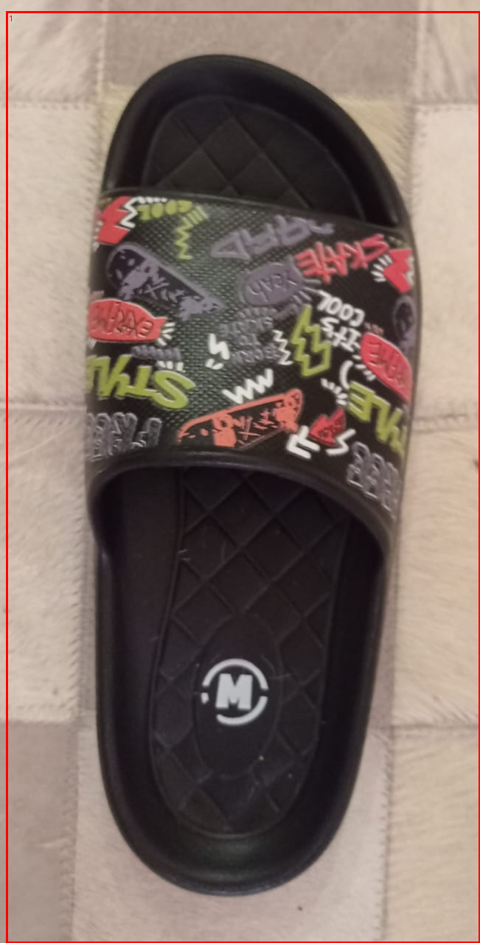

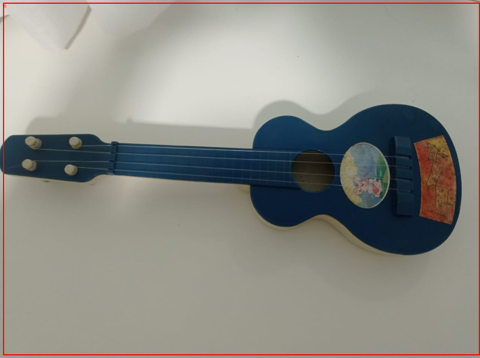

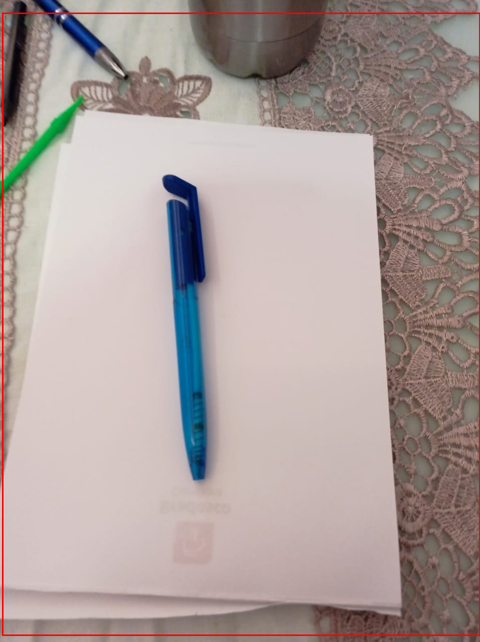

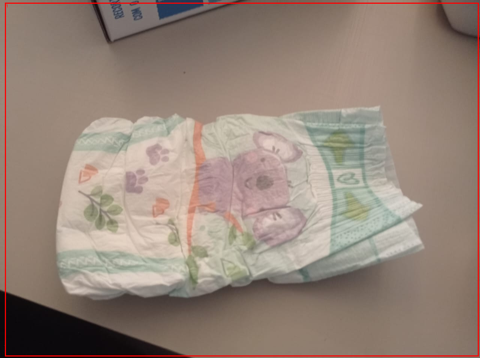

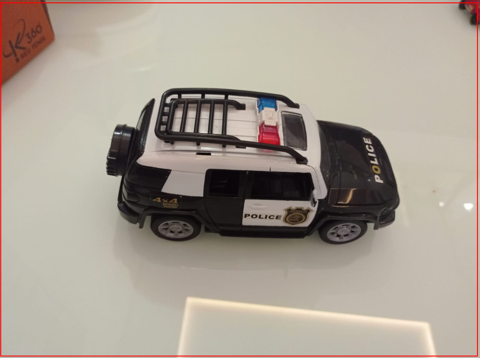

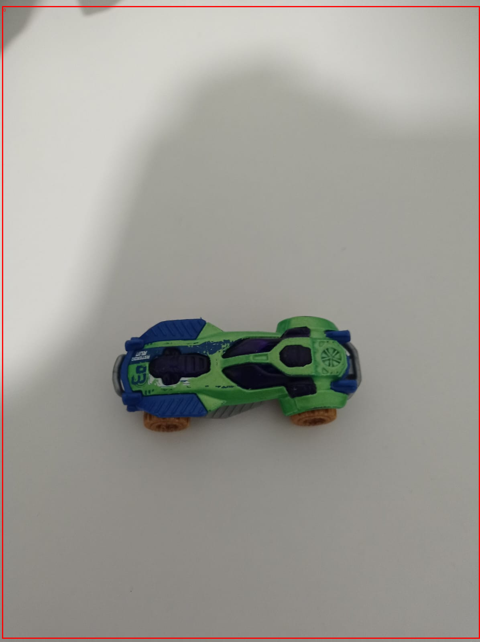

In [39]:
# Visual check corrigido e mais robusto
from PIL import Image, ImageDraw, ImageFont
import glob, os
from IPython.display import display

IMG_DIR = "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test"
LBL_DIR = "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/test"

imgs = sorted(glob.glob(os.path.join(IMG_DIR, "*")))[:6]
if not imgs:
    print("Nenhuma imagem encontrada em:", IMG_DIR)
else:
    for im_path in imgs:
        base = os.path.splitext(os.path.basename(im_path))[0]
        lbl_path = os.path.join(LBL_DIR, base + ".txt")
        try:
            img = Image.open(im_path).convert('RGB')
        except Exception as e:
            print("Erro abrindo imagem", im_path, ":", e)
            continue
        w, h = img.size
        d = ImageDraw.Draw(img)
        if os.path.exists(lbl_path):
            for i, l in enumerate(open(lbl_path, 'r', encoding='utf-8').read().splitlines()):
                if not l.strip():
                    continue
                parts = l.split()
                if len(parts) < 5:
                    print(f"Atenção: linha com menos de 5 campos em {lbl_path}: '{l}'")
                    continue
                try:
                    cls, xc, yc, ww, hh = map(float, parts[:5])
                except Exception as e:
                    print("Erro parseando linha em", lbl_path, ":", e)
                    continue
                x0 = (xc - ww/2) * w
                x1 = (xc + ww/2) * w
                y0 = (yc - hh/2) * h
                y1 = (yc + hh/2) * h    # <- correção aqui
                d.rectangle([x0, y0, x1, y1], outline='red', width=3)
                d.text((max(x0,0)+3, max(y0,0)+3), str(int(cls)), fill='red')
        else:
            d.text((10,10), "Sem .txt correspondente", fill='yellow')
        # redimensiona para visualizar melhor no notebook (mantém proporção)
        display(img.resize((480, int(480 * h / w))))


In [40]:
import glob, os

LBL_DIR = "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/test"
files = sorted(glob.glob(os.path.join(LBL_DIR, "*.txt")))[:6]

if not files:
    print("Nenhum .txt em:", LBL_DIR)
else:
    for f in files:
        print("----", os.path.basename(f), "----")
        for ln in open(f, 'r', encoding='utf-8').read().splitlines():
            if not ln.strip():
                continue
            parts = ln.split()
            if len(parts) < 5:
                print("  linha inválida:", ln)
                continue
            cls, xc, yc, w, h = parts[:5]
            xc, yc, w, h = map(float, (xc, yc, w, h))
            print(f"  cls={cls}  xc={xc:.3f} yc={yc:.3f} w={w:.3f} h={h:.3f}")
            if w > 0.9 or h > 0.9:
                print("   >> ALERTA: bbox ocupa quase toda a imagem (w>0.9 ou h>0.9). Verifique anotação.")
        print()


---- WhatsApp Image 2025-10-10 at 14.22.08.txt ----
  cls=1  xc=0.507 yc=0.506 w=0.987 h=0.988
   >> ALERTA: bbox ocupa quase toda a imagem (w>0.9 ou h>0.9). Verifique anotação.

---- WhatsApp Image 2025-10-10 at 14.22.16 (1).txt ----
  cls=0  xc=0.503 yc=0.500 w=0.993 h=0.985
   >> ALERTA: bbox ocupa quase toda a imagem (w>0.9 ou h>0.9). Verifique anotação.

---- WhatsApp Image 2025-10-10 at 14.22.17.txt ----
  cls=1  xc=0.503 yc=0.505 w=0.995 h=0.970
   >> ALERTA: bbox ocupa quase toda a imagem (w>0.9 ou h>0.9). Verifique anotação.

---- WhatsApp Image 2025-10-10 at 14.22.24.txt ----
  cls=1  xc=0.504 yc=0.501 w=0.987 h=0.988
   >> ALERTA: bbox ocupa quase toda a imagem (w>0.9 ou h>0.9). Verifique anotação.

---- WhatsApp Image 2025-10-10 at 14.22.34.txt ----
  cls=0  xc=0.498 yc=0.501 w=0.994 h=0.988
   >> ALERTA: bbox ocupa quase toda a imagem (w>0.9 ou h>0.9). Verifique anotação.

---- WhatsApp Image 2025-10-10 at 14.22.35 (1).txt ----
  cls=0  xc=0.503 yc=0.502 w=0.995 h=0.985
  

In [ ]:

# ## 2. Instalar YOLOv5

# Clonar o repositório do YOLOv5 e instalar dependências
!git clone -q https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -qr requirements.txt
print('YOLOv5 instalado.')


In [42]:
# 1) Montar Google Drive (executar primeiro)
from google.colab import drive
drive.mount('/content/drive')

# 2) Defina o caminho base no Drive (ajuste se quiser)
BASE_DRIVE = "/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset"

# cria as pastas necessárias (train/val/test e labels)
import os
os.makedirs(os.path.join(BASE_DRIVE, "images","train"), exist_ok=True)
os.makedirs(os.path.join(BASE_DRIVE, "images","val"), exist_ok=True)
os.makedirs(os.path.join(BASE_DRIVE, "images","test"), exist_ok=True)
os.makedirs(os.path.join(BASE_DRIVE, "labels","train"), exist_ok=True)
os.makedirs(os.path.join(BASE_DRIVE, "labels","val"), exist_ok=True)
os.makedirs(os.path.join(BASE_DRIVE, "labels","test"), exist_ok=True)

print("Pastas criadas/confirmadas em:", BASE_DRIVE)


ValueError: Mountpoint must not already contain files

In [43]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


ValueError: Mountpoint must not already contain files

In [44]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: Mountpoint must not already contain files

In [1]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: Mountpoint must not already contain files

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ValueError: Mountpoint must not already contain files

In [1]:
# mostra o que existe no ponto de montagem local
!ls -la /content/drive || echo "/content/drive não existe"


ls: cannot access '/content/drive': No such file or directory
/content/drive não existe


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Saving labels_my-project-name_2025-10-14-04-07-04.zip to labels_my-project-name_2025-10-14-04-07-04.zip
Arquivo enviado: labels_my-project-name_2025-10-14-04-07-04.zip

Extração concluída em: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset

Total arquivos extraídos: 39 (recursivo pode conter subpastas)
Imagens encontradas (amostra até 20): ['/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg', '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.08 (2).jpeg', '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.08.jpeg', '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.09.jpeg', '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.11 (1).jpeg', '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train

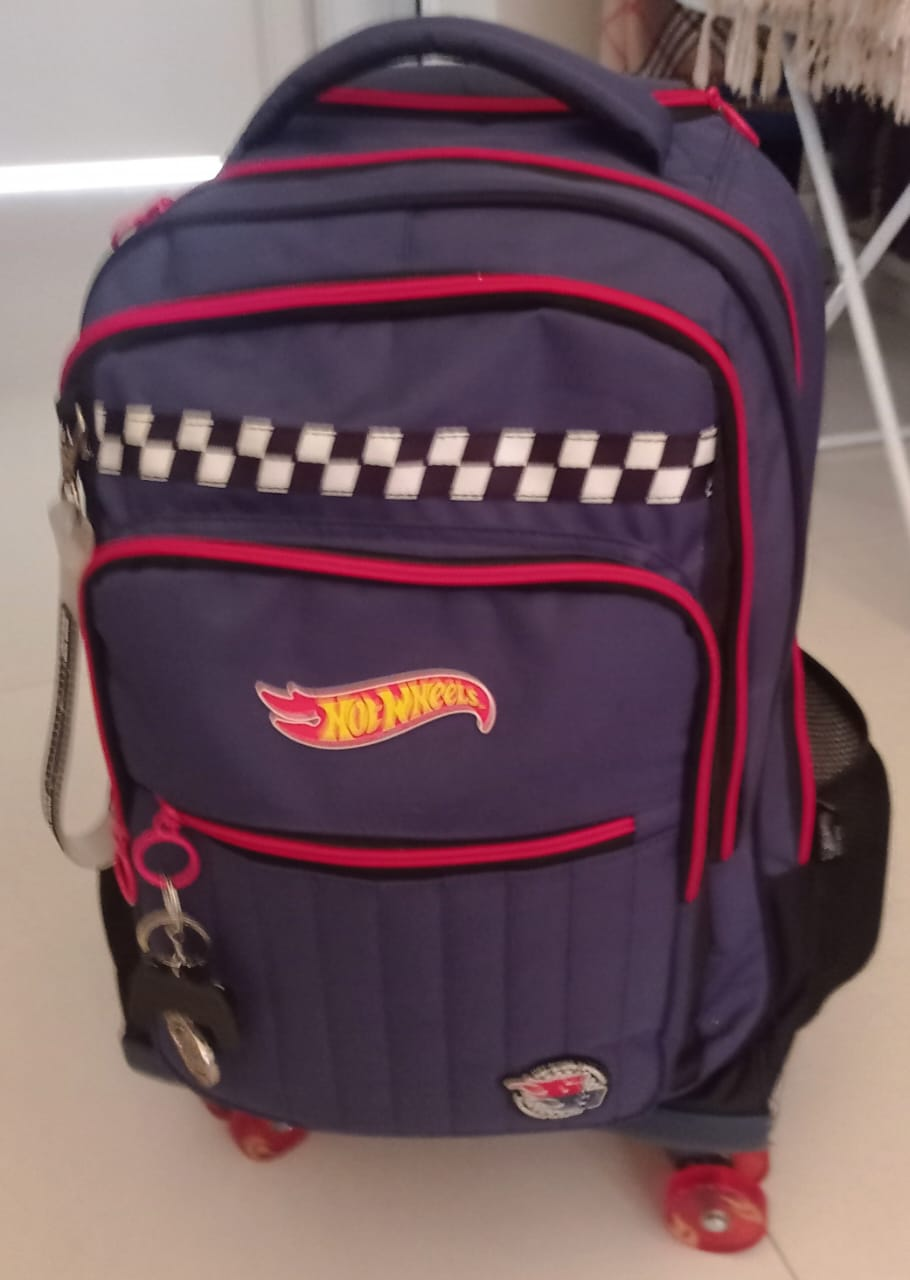


Conteúdo do primeiro arquivo de label (primeiras 10 linhas):
1 0.494725 0.500000 0.952967 0.970000


In [3]:
# 1) Upload do ZIP do seu PC para a VM (vai abrir diálogo de seleção de arquivo)
from google.colab import files
uploaded = files.upload()   # escolha C:\Users\Usuario\Downloads\labels_my-project-name_2025-10-14-04-07-04.zip
if not uploaded:
    raise SystemExit("Nenhum arquivo enviado. Execute novamente e selecione o ZIP.")

zip_name = list(uploaded.keys())[0]
print("Arquivo enviado:", zip_name)

# 2) Extrair o ZIP direto para o Drive (ajuste o destino se quiser outro)
import zipfile, os, shutil, glob
DEST = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'  # ajuste se desejar outro local no Drive
os.makedirs(DEST, exist_ok=True)

with zipfile.ZipFile(zip_name, 'r') as z:
    z.extractall(DEST)

print("\nExtração concluída em:", DEST)

# 3) Listar os arquivos extraídos (amostra) e contar imagens/labels
imgs = sorted([p for p in glob.glob(os.path.join(DEST, '**'), recursive=True) if p.lower().endswith(('.jpg','.jpeg','.png'))])
txts = sorted([p for p in glob.glob(os.path.join(DEST, '**'), recursive=True) if p.lower().endswith('.txt')])

print(f"\nTotal arquivos extraídos: {len(os.listdir(DEST))} (recursivo pode conter subpastas)")
print("Imagens encontradas (amostra até 20):", imgs[:20])
print("Labels (.txt) encontradas (amostra até 20):", txts[:20])

# 4) Mostrar a primeira imagem e o conteúdo da primeira label para confirmar formato YOLO
from IPython.display import display, Image, Markdown

if imgs:
    print("\nMostrando a primeira imagem encontrada:")
    display(Image(imgs[0], width=480))
else:
    print("\nNenhuma imagem encontrada para visualizar.")

if txts:
    print("\nConteúdo do primeiro arquivo de label (primeiras 10 linhas):")
    with open(txts[0], 'r', encoding='utf-8', errors='ignore') as f:
        for i, ln in enumerate(f):
            if i>=10: break
            print(ln.strip())
else:
    print("\nNenhum arquivo .txt de label encontrado.")


In [4]:
# === Organizar dataset (copiar para estrutura train/val/test + criar dataset.yaml) ===
import os, glob, random, shutil, yaml
from pathlib import Path

# Ajuste caso tenha extraído em outro caminho
BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
os.makedirs(BASE, exist_ok=True)

# procurar imagens e labels recursivamente na pasta BASE (onde você extraiu o zip)
img_exts = ('.jpg','.jpeg','.png')
all_imgs = sorted([p for p in glob.glob(os.path.join(BASE, '**'), recursive=True) if p.lower().endswith(img_exts)])
all_txts = sorted([p for p in glob.glob(os.path.join(BASE, '**'), recursive=True) if p.lower().endswith('.txt')])

print(f"Imagens encontradas (recursivo): {len(all_imgs)}")
print(f"Labels .txt encontradas (recursivo): {len(all_txts)}")

# mapear base names
def basename_no_ext(p): return Path(p).stem

imgs_map = {basename_no_ext(p): p for p in all_imgs}
txts_map = {basename_no_ext(p): p for p in all_txts}
common_keys = sorted(set(imgs_map.keys()) & set(txts_map.keys()))
print(f"Pares válidos (imagem + txt): {len(common_keys)}")

# se quiser mudar as proporções, altere aqui:
train_ratio = 0.7
val_ratio   = 0.15
test_ratio  = 0.15

# criar pastas destino
DST = Path(BASE)
IMG_DIRS = {
    'train': DST/'images'/'train',
    'val'  : DST/'images'/'val',
    'test' : DST/'images'/'test'
}
LBL_DIRS = {
    'train': DST/'labels'/'train',
    'val'  : DST/'labels'/'val',
    'test' : DST/'labels'/'test'
}
for d in list(IMG_DIRS.values()) + list(LBL_DIRS.values()):
    d.mkdir(parents=True, exist_ok=True)

# embaralhar e dividir
random.seed(42)
keys = common_keys.copy()
random.shuffle(keys)
n = len(keys)
n_train = int(n * train_ratio)
n_val   = int(n * val_ratio)
n_test  = n - n_train - n_val

train_keys = keys[:n_train]
val_keys   = keys[n_train:n_train+n_val]
test_keys  = keys[n_train+n_val:]

splits = {'train': train_keys, 'val': val_keys, 'test': test_keys}

# copiar arquivos (tratando possíveis conflitos)
from shutil import copy2
from shutil import SameFileError

def safe_copy(src, dst_dir):
    dst = Path(dst_dir) / Path(src).name
    try:
        if Path(src).resolve() == dst.resolve():
            # mesmo arquivo, ignora
            return False
    except Exception:
        pass
    try:
        copy2(src, dst)
        return True
    except SameFileError:
        return False
    except Exception as e:
        print("Erro copiando:", src, "->", dst, e)
        return False

copied = {'train':0,'val':0,'test':0}
for split, keys in splits.items():
    for k in keys:
        img_src = imgs_map[k]
        txt_src = txts_map[k]
        if safe_copy(img_src, IMG_DIRS[split]):
            copied[split] += 1
        safe_copy(txt_src, LBL_DIRS[split])

print("\nCópia concluída (imagens):", copied)

# criar dataset.yaml (padrão YOLO)
dataset_yaml = {
    'path': str(BASE),
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': 2,                  # ajuste se tiver outro número de classes
    'names': ['objeto_A','objeto_B']  # ajuste os nomes das classes se necessário
}
yaml_path = DST/'dataset.yaml'
with open(yaml_path, 'w', encoding='utf-8') as f:
    yaml.dump(dataset_yaml, f, sort_keys=False, allow_unicode=True)

print("\nArquivo dataset.yaml criado em:", yaml_path)
print("Conteúdo (resumido):")
print(yaml.safe_dump(dataset_yaml, sort_keys=False, allow_unicode=True))

# mostrar amostras finais
print("\nResumo final por pasta:")
for s in ('train','val','test'):
    imgs_here = sorted(glob.glob(str(IMG_DIRS[s]/'*')))
    lbls_here = sorted(glob.glob(str(LBL_DIRS[s]/'*')))
    print(f"{s}: imagens={len(imgs_here)} labels={len(lbls_here)} (ex.: {imgs_here[:3]})")

print("\nPronto — estrutura organizada. Próximo passo: treinar com YOLOv5 (se já tiver clonada).")


Imagens encontradas (recursivo): 36
Labels .txt encontradas (recursivo): 72
Pares válidos (imagem + txt): 36

Cópia concluída (imagens): {'train': 0, 'val': 5, 'test': 6}

Arquivo dataset.yaml criado em: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/dataset.yaml
Conteúdo (resumido):
path: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset
train: images/train
val: images/val
test: images/test
nc: 2
names:
- objeto_A
- objeto_B


Resumo final por pasta:
train: imagens=36 labels=48 (ex.: ['/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg', '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.08 (2).jpeg', '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/train/WhatsApp Image 2025-10-10 at 14.22.08.jpeg'])
val: imagens=5 labels=5 (ex.: ['/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/val/WhatsApp Image 2025-10-10 at 14.22.09.jpeg', '/

In [5]:
# 1) checar pares e órfãos (executar)
import os, glob, shutil
from pathlib import Path

BASE = '/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset'
IMG_DIR = Path(BASE)/'images'
LBL_DIR = Path(BASE)/'labels'

def list_files(p, exts):
    return sorted([Path(x) for x in glob.glob(str(p/'**/*'), recursive=True) if Path(x).suffix.lower() in exts])

imgs = list_files(Path(BASE)/'images', ('.jpg','.jpeg','.png'))
lbls = list_files(Path(BASE)/'labels', ('.txt',))

imgs_map = {p.stem:p for p in imgs}
lbls_map = {p.stem:p for p in lbls}

only_imgs = sorted([v for k,v in imgs_map.items() if k not in lbls_map])
only_lbls = sorted([v for k,v in lbls_map.items() if k not in imgs_map])
both = sorted([k for k in imgs_map.keys() if k in lbls_map])

print(f"Total imagens encontradas (todas as splits): {len(imgs)}")
print(f"Total labels .txt (todas as splits): {len(lbls)}")
print(f"Pares válidos (img+txt): {len(both)}")
print(f"Imagens sem label (sample até 20): {only_imgs[:20]}")
print(f"Labels sem imagem (sample até 20): {only_lbls[:20]}")

# Se quiser apagar labels órfãos automaticamente, descomente a próxima seção:
DELETE_ORPHANS = False  # <-- coloque True para apagar os labels sem imagem (apagar permanentemente)
if DELETE_ORPHANS and only_lbls:
    print("\nRemovendo labels órfãos:")
    for f in only_lbls:
        try:
            f.unlink()
            print("Removido:", f)
        except Exception as e:
            print("Erro removendo:", f, e)
    print("Remoção concluída. Rode esta célula novamente para confirmar.")


Total imagens encontradas (todas as splits): 47
Total labels .txt (todas as splits): 59
Pares válidos (img+txt): 36
Imagens sem label (sample até 20): []
Labels sem imagem (sample até 20): [PosixPath('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.08 (1) (1).txt'), PosixPath('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.08 (2) (1).txt'), PosixPath('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.11 (1) (1).txt'), PosixPath('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.13 (1) (1).txt'), PosixPath('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.16 (1) (1).txt'), PosixPath('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.16 (2) (1).txt'), PosixPath('/conten

In [6]:
# Mostra labels sem imagem e conteúdo das primeiras 5
from pathlib import Path
import glob

BASE = Path('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset')
lbls = sorted([Path(x) for x in glob.glob(str(BASE/'labels'/'**'/'*.txt'), recursive=True)])
imgs = sorted([Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpeg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.png'), recursive=True)])

imgs_stems = {p.stem for p in imgs}
only_lbls = [p for p in lbls if p.stem not in imgs_stems]

print(f"Total labels .txt: {len(lbls)}")
print(f"Labels sem imagem (total): {len(only_lbls)}")
print("Amostra (até 20) dos labels sem imagem:")
for p in only_lbls[:20]:
    print("-", p)

# mostrar conteúdo dos primeiros 5 arquivos órfãos:
print("\nConteúdo dos primeiros 5 labels órfãos:")
for p in only_lbls[:5]:
    print(f"\n---- {p.name} ----")
    try:
        print(p.read_text(encoding='utf-8'))
    except Exception as e:
        print("Erro ao ler:", e)


Total labels .txt: 59
Labels sem imagem (total): 17
Amostra (até 20) dos labels sem imagem:
- /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.08 (1) (1).txt
- /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.08 (2) (1).txt
- /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.11 (1) (1).txt
- /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.13 (1) (1).txt
- /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.16 (1) (1).txt
- /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.16 (2) (1).txt
- /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/train/WhatsApp Image 2025-10-10 at 14.22.18 (1) (1).txt
- /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/trai

In [7]:
# Move os labels órfãos para uma pasta de backup
from pathlib import Path
import shutil, os, glob

BASE = Path('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset')
backup_dir = BASE/'labels'/'orphans_backup'
backup_dir.mkdir(parents=True, exist_ok=True)

lbls = sorted([Path(x) for x in glob.glob(str(BASE/'labels'/'**'/'*.txt'), recursive=True)])
imgs = sorted([Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpeg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.png'), recursive=True)])
imgs_stems = {p.stem for p in imgs}
only_lbls = [p for p in lbls if p.stem not in imgs_stems]

print(f"Movendo {len(only_lbls)} labels órfãos para: {backup_dir}")
for p in only_lbls:
    dest = backup_dir / p.name
    try:
        shutil.move(str(p), str(dest))
    except Exception as e:
        print("Erro movendo", p, e)

print("Movimento concluído. Rode a verificação novamente para confirmar.")


Movendo 17 labels órfãos para: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/orphans_backup
Movimento concluído. Rode a verificação novamente para confirmar.


In [8]:
# Apagar labels órfãos (IRREVERSÍVEL)
DELETE_ORPHANS = False  # coloque True para realmente apagar
from pathlib import Path
import glob, os

BASE = Path('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset')
lbls = sorted([Path(x) for x in glob.glob(str(BASE/'labels'/'**'/'*.txt'), recursive=True)])
imgs = sorted([Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpeg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.png'), recursive=True)])
imgs_stems = {p.stem for p in imgs}
only_lbls = [p for p in lbls if p.stem not in imgs_stems]

print("Labels órfãos encontrados:", len(only_lbls))
if DELETE_ORPHANS:
    for p in only_lbls:
        try:
            p.unlink()
            print("Apagado:", p)
        except Exception as e:
            print("Erro apagando:", p, e)
    print("Apagamento concluído.")
else:
    print("DELETE_ORPHANS está False — nada foi apagado. Mude para True se quiser apagar.")


Labels órfãos encontrados: 17
DELETE_ORPHANS está False — nada foi apagado. Mude para True se quiser apagar.


In [9]:
# === MOVER LABELS ÓRFÃOS PARA BACKUP (RECOMENDADO) ===
from pathlib import Path
import glob, shutil

BASE = Path('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset')
backup_dir = BASE/'labels'/'orphans_backup'
backup_dir.mkdir(parents=True, exist_ok=True)

# localizar labels e imagens (jpg/jpeg/png)
lbls = sorted([Path(x) for x in glob.glob(str(BASE/'labels'/'**'/'*.txt'), recursive=True)])
imgs = sorted([Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpeg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.png'), recursive=True)])

imgs_stems = {p.stem for p in imgs}
orphans = [p for p in lbls if p.stem not in imgs_stems]

print(f"Encontrados {len(orphans)} labels órfãos. Movendo para: {backup_dir}\n")

moved = []
for p in orphans:
    dest = backup_dir / p.name
    try:
        shutil.move(str(p), str(dest))
        moved.append((p, dest))
    except Exception as e:
        print("Erro movendo", p, "->", e)

# resumo
print(f"\nMovidos: {len(moved)} arquivos.")
for a,b in moved[:50]:
    print("-", a.name, "->", b.relative_to(BASE))

# opcional: salvar log com detalhes
log_path = backup_dir/'moved_orphans_log.txt'
with open(log_path, 'w', encoding='utf-8') as f:
    f.write("moved_orphans_log\n")
    for a,b in moved:
        f.write(f"{a} -> {b}\n")
print("\nLog salvo em:", log_path)


Encontrados 17 labels órfãos. Movendo para: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/orphans_backup


Movidos: 17 arquivos.
- WhatsApp Image 2025-10-10 at 14.22.08 (1) (1).txt -> labels/orphans_backup/WhatsApp Image 2025-10-10 at 14.22.08 (1) (1).txt
- WhatsApp Image 2025-10-10 at 14.22.08 (2) (1).txt -> labels/orphans_backup/WhatsApp Image 2025-10-10 at 14.22.08 (2) (1).txt
- WhatsApp Image 2025-10-10 at 14.22.11 (1) (1).txt -> labels/orphans_backup/WhatsApp Image 2025-10-10 at 14.22.11 (1) (1).txt
- WhatsApp Image 2025-10-10 at 14.22.13 (1) (1).txt -> labels/orphans_backup/WhatsApp Image 2025-10-10 at 14.22.13 (1) (1).txt
- WhatsApp Image 2025-10-10 at 14.22.16 (1) (1).txt -> labels/orphans_backup/WhatsApp Image 2025-10-10 at 14.22.16 (1) (1).txt
- WhatsApp Image 2025-10-10 at 14.22.16 (2) (1).txt -> labels/orphans_backup/WhatsApp Image 2025-10-10 at 14.22.16 (2) (1).txt
- WhatsApp Image 2025-10-10 at 14.22.18 (1) (1).txt -> labels/orphans_backup/WhatsApp Image 2

In [10]:
# === RE-CHECAGEM RÁPIDA (confirma 1:1) ===
from pathlib import Path
import glob

BASE = Path('/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset')
imgs = sorted([Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.jpeg'), recursive=True)] +
              [Path(x) for x in glob.glob(str(BASE/'images'/'**'/'*.png'), recursive=True)])
lbls = sorted([Path(x) for x in glob.glob(str(BASE/'labels'/'**'/'*.txt'), recursive=True)])

imgs_stems = {p.stem for p in imgs}
lbls_stems = {p.stem for p in lbls}

pairs = len(imgs_stems & lbls_stems)
only_imgs = [p for p in imgs if p.stem not in lbls_stems]
only_lbls = [p for p in lbls if p.stem not in imgs_stems]

print("Imagens:", len(imgs))
print("Labels:", len(lbls))
print("Pares válidos (img+txt):", pairs)
print("\nImagens sem label (ex.):", [p.name for p in only_imgs[:10]])
print("Labels sem imagem (ex.):", [p.name for p in only_lbls[:10]])


Imagens: 47
Labels: 60
Pares válidos (img+txt): 36

Imagens sem label (ex.): []
Labels sem imagem (ex.): ['WhatsApp Image 2025-10-10 at 14.22.08 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.08 (2) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.11 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.13 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.16 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.16 (2) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.18 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.23 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.24 (1) (1).txt', 'WhatsApp Image 2025-10-10 at 14.22.31 (1) (1).txt']


train: imagens=36  labels=31
val: imagens=5  labels=5
test: imagens=6  labels=6
Pares válidos (img+txt): 36
Amostra imagem: WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg


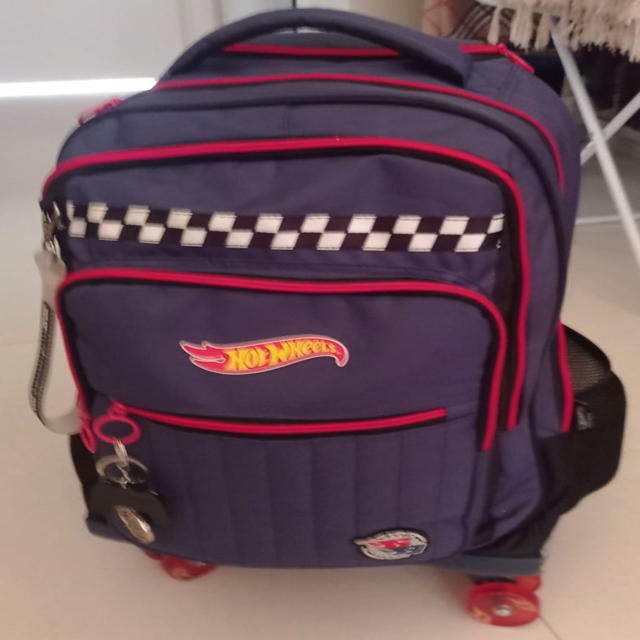

In [11]:
from pathlib import Path
from PIL import Image, ImageOps, ImageDraw, ImageFont

BASE = Path("/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset")

for split in ("train","val","test"):
    imgs = list((BASE/"images"/split).glob("*.*"))
    lbls = list((BASE/"labels"/split).glob("*.txt"))
    print(f"{split}: imagens={len(imgs)}  labels={len(lbls)}")

# pares válidos
imgs_all = {p.stem for p in (BASE/"images").glob("**/*.*")}
lbls_all = {p.stem for p in (BASE/"labels").glob("**/*.txt")}
pairs = imgs_all & lbls_all
print("Pares válidos (img+txt):", len(pairs))

# mostra conteúdo do primeiro label de train e exibe a imagem correspondente
train_imgs = sorted((BASE/"images"/"train").glob("*.*"))
if train_imgs:
    img_path = train_imgs[0]
    lab_path = (BASE/"labels"/"train"/(img_path.stem + ".txt"))
    print("Amostra imagem:", img_path.name)
    if lab_path.exists():
        print("Conteúdo do label (primeiras linhas):")
        print("\n".join(lab_path.read_text().splitlines()[:10]))
    display(Image.open(img_path).resize((640,640)))
else:
    print("Não há imagens em train.")


In [12]:
import torch
print("PyTorch CUDA disponível:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))


PyTorch CUDA disponível: True
Device: Tesla T4


In [13]:
# clone e instala
!git clone -q https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -qr requirements.txt


/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.0 MB/s eta 0:00:00


In [14]:
# ajuste o caminho se necessário
!cp /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/dataset.yaml data/fase6_dataset.yaml
# mostra as primeiras linhas para confirmar
!sed -n '1,200p' data/fase6_dataset.yaml


path: /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset
train: images/train
val: images/val
test: images/test
nc: 2
names:
- objeto_A
- objeto_B


In [15]:
# treinar (ex.: img=640, batch=8, epochs=50)
!python train.py --img 640 --batch 8 --epochs 50 --data data/fase6_dataset.yaml --weights yolov5s.pt --device 0 --name fase6_run


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-14 22:20:33.234729: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760480433.255205   13909 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760480433.261272   13909 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

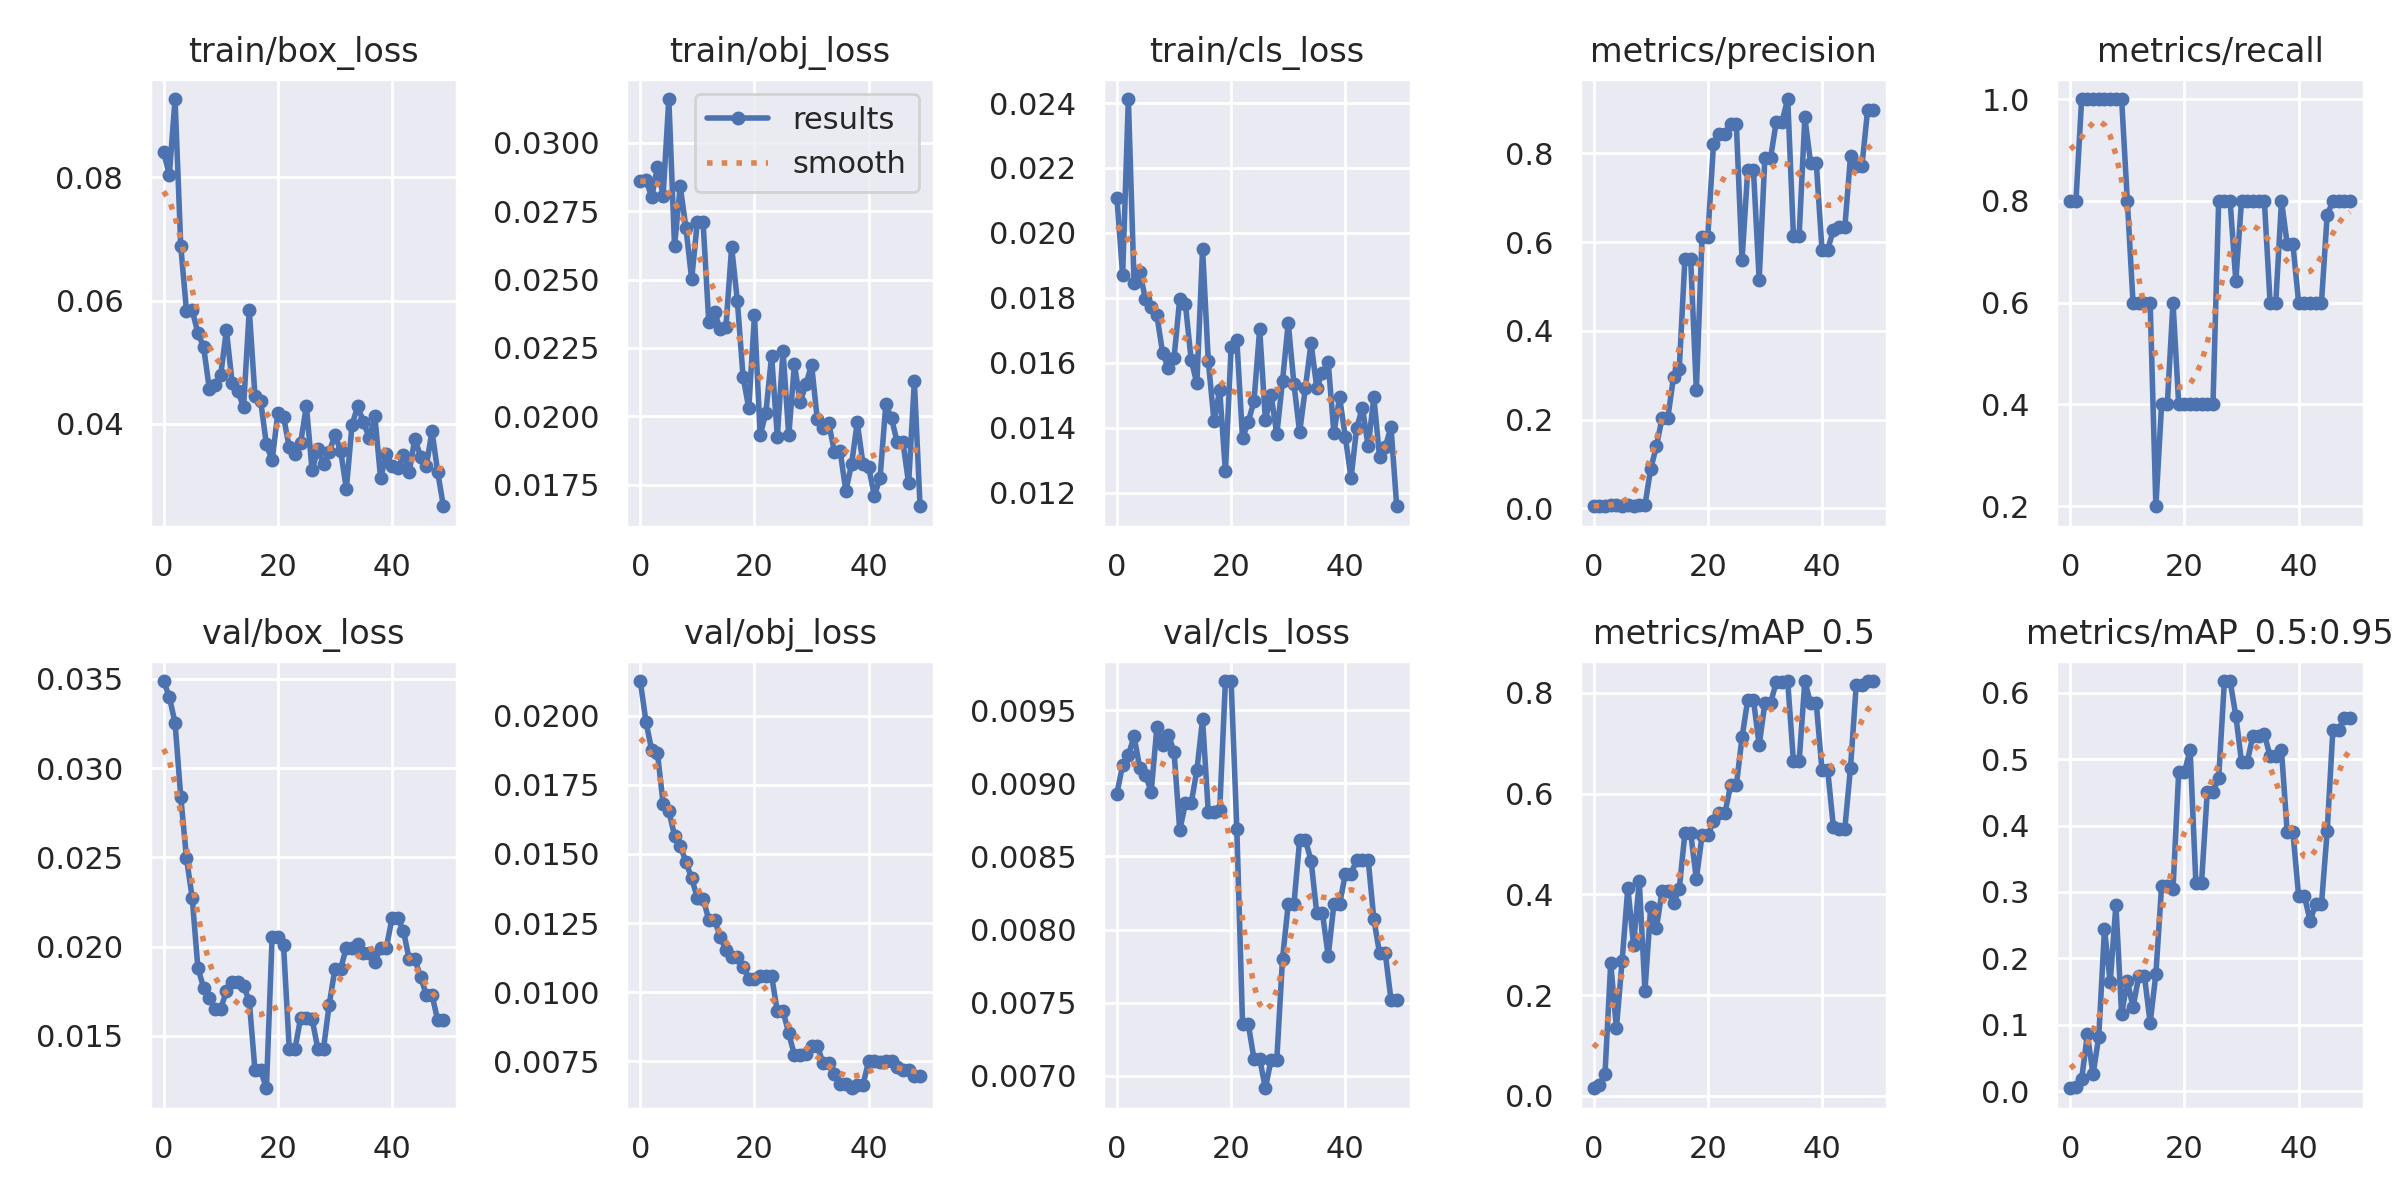

In [16]:
from IPython.display import Image, display
display(Image('runs/train/fase6_run/results.png'))


total 3388
drwxr-xr-x 3 root root    4096 Oct 14 22:24 .
drwxr-xr-x 3 root root    4096 Oct 14 22:21 ..
-rw-r--r-- 1 root root   96428 Oct 14 22:24 confusion_matrix.png
-rw-r--r-- 1 root root 1063230 Oct 14 22:24 events.out.tfevents.1760480466.09c1fa99d94d.13909.0
-rw-r--r-- 1 root root  101228 Oct 14 22:24 F1_curve.png
-rw-r--r-- 1 root root     373 Oct 14 22:21 hyp.yaml
-rw-r--r-- 1 root root  137997 Oct 14 22:21 labels_correlogram.jpg
-rw-r--r-- 1 root root  105677 Oct 14 22:21 labels.jpg
-rw-r--r-- 1 root root    1124 Oct 14 22:21 opt.yaml
-rw-r--r-- 1 root root   97669 Oct 14 22:24 P_curve.png
-rw-r--r-- 1 root root   79129 Oct 14 22:24 PR_curve.png
-rw-r--r-- 1 root root   92033 Oct 14 22:24 R_curve.png
-rw-r--r-- 1 root root   14994 Oct 14 22:24 results.csv
-rw-r--r-- 1 root root  357732 Oct 14 22:24 results.png
-rw-r--r-- 1 root root  324825 Oct 14 22:21 train_batch0.jpg
-rw-r--r-- 1 root root  297786 Oct 14 22:21 train_batch1.jpg
-rw-r--r-- 1 root root  305342 Oct 14 22:21 tra

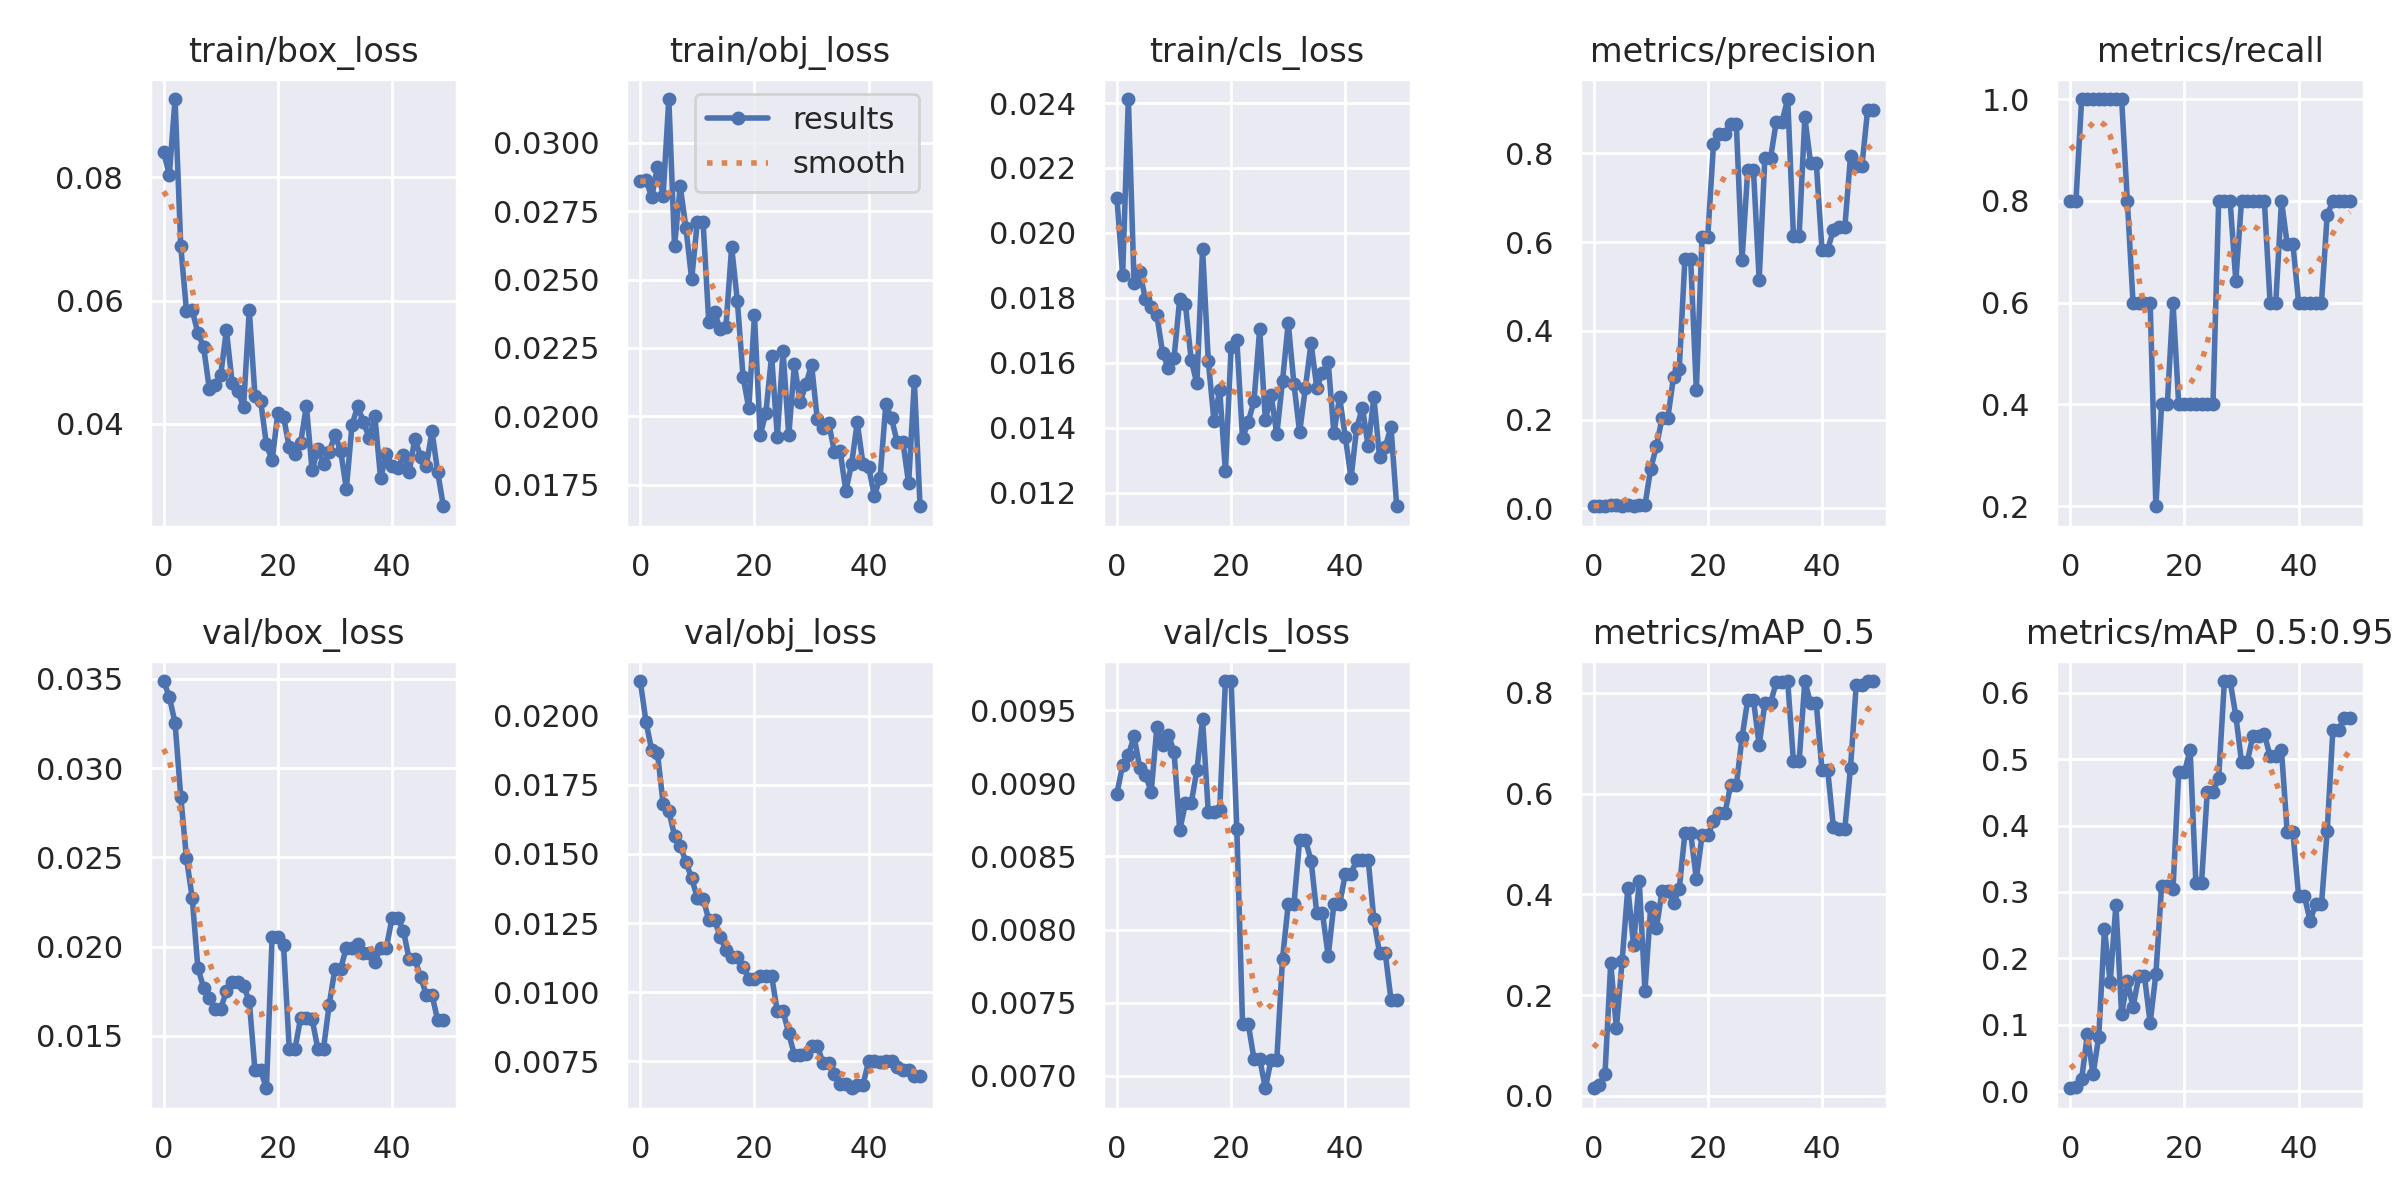

In [17]:
# listar a pasta do run
!ls -la runs/train/fase6_run
!ls -la runs/train/fase6_run/weights

# mostrar o gráfico de treino (já apareceu mas caso queira mostrar de novo)
from IPython.display import Image, display
display(Image('runs/train/fase6_run/results.png'))


In [18]:
# cria uma pasta no Drive (ajuste o caminho se quiser)
!mkdir -p /content/drive/MyDrive/Fase6_YOLO/runs_backups

# copiar o best.pt
!cp runs/train/fase6_run/weights/best.pt /content/drive/MyDrive/Fase6_YOLO/runs_backups/fase6_run_best.pt

# confirmar cópia
!ls -la /content/drive/MyDrive/Fase6_YOLO/runs_backups


total 14068
-rw------- 1 root root 14405423 Oct 14 22:30 fase6_run_best.pt


detect: weights=['runs/train/fase6_run/weights/best.pt'], source=/content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=fase6_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/6 /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test/WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg: 640x480 1 objeto_B, 31.9ms
image 2/6 /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test/WhatsApp Image 2025-10-10

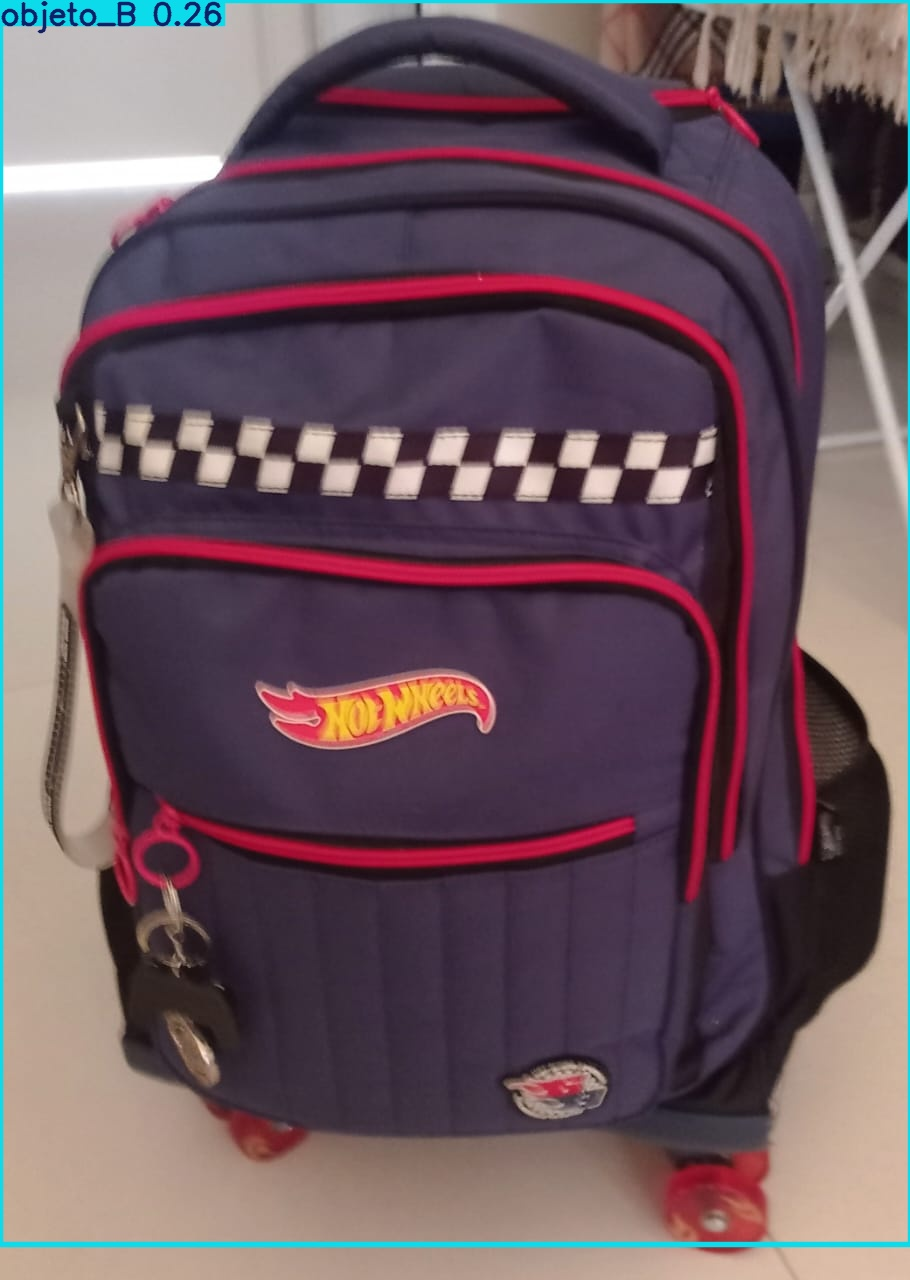

In [19]:
# detect.py (vai gerar pastas em runs/detect/)
!python detect.py --weights runs/train/fase6_run/weights/best.pt --source /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/images/test --conf 0.25 --save-txt --save-conf --name fase6_detect

# listar resultado
!ls -la runs/detect/fase6_detect

# mostrar uma imagem resultante (ajuste o nome do arquivo mostrado)
from IPython.display import Image, display
display(Image('runs/detect/fase6_detect/WhatsApp Image 2025-10-10 at 14.22.08 (1).jpeg'))  # ajuste se o nome variar


In [20]:
# validação com o YAML que você gerou para o dataset
!python val.py --weights runs/train/fase6_run/weights/best.pt --data data/fase6_dataset.yaml --img 640 --task val


val: data=data/fase6_dataset.yaml, weights=['runs/train/fase6_run/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/Fase6_YOLO/datasets/seu_dataset/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.57it/s]
                   all          5          5       0.76        0.8      0.786      0.618
              objeto_A          5          5       0.76        0.8      0.786      0.6

In [21]:
# criar pasta de backup no Drive (ajuste caminho se quiser)
!mkdir -p /content/drive/MyDrive/Fase6_YOLO/runs_backups

# copiar best.pt
!cp runs/train/fase6_run/weights/best.pt /content/drive/MyDrive/Fase6_YOLO/runs_backups/fase6_run_best.pt

# confirmar
!ls -la /content/drive/MyDrive/Fase6_YOLO/runs_backups


total 14068
-rw------- 1 root root 14405423 Oct 14 22:36 fase6_run_best.pt


In [22]:
from google.colab import files
files.download('runs/train/fase6_run/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# ver o que tem
!ls -la /content

# remover arquivo único (exemplo)
!rm -f /content/labels_my-project-name_2025-10-14-04-07-04.zip

# remover pasta inteira (cuidado!)
!rm -rf /content/pasta_que_quiser_apagar


total 32
drwxr-xr-x  1 root root 4096 Oct 14 22:10 .
drwxr-xr-x  1 root root 4096 Oct 14 21:26 ..
drwxr-xr-x  4 root root 4096 Oct 13 13:43 .config
drwx------  5 root root 4096 Oct 14 21:32 drive
-rw-r--r--  1 root root 7178 Oct 14 21:46 labels_my-project-name_2025-10-14-04-07-04.zip
drwxr-xr-x  1 root root 4096 Oct 13 13:43 sample_data
drwxr-xr-x 11 root root 4096 Oct 14 22:21 yolov5


In [ ]:

# ## 3. Treinamento do modelo (30 e 60 épocas)

import time, glob, os

runs_info = []

def train_yolo(epochs, run_name):
    start = time.time()
    !python train.py --img 640 --batch 16 --epochs {epochs} --data /content/dataset.yaml --weights yolov5s.pt --name {run_name} --project runs/detect
    duration = time.time() - start
    exp_dir = sorted(glob.glob(f'runs/detect/{run_name}*'))[-1]
    runs_info.append({'run': os.path.basename(exp_dir), 'epochs': epochs, 'duration_s': duration})

# Treinar com 30 e 60 épocas
train_yolo(30, 'fase6_e30')
train_yolo(60, 'fase6_e60')

print('Treinamentos concluídos. Resumo:', runs_info)


In [ ]:

# ## 4. Comparar métricas dos modelos

import pandas as pd, glob, os
from pathlib import Path

def extract_metrics(exp_dir):
    csv_files = glob.glob(os.path.join(exp_dir, 'results.csv'))
    if csv_files:
        df = pd.read_csv(csv_files[0])
        last_row = df.iloc[-1]
        return {
            'run': Path(exp_dir).name,
            'epochs': int(last_row.get('epoch', 0)),
            'mAP@0.5': float(last_row.get('mAP_0.5', last_row.get('metrics/mAP_0.5', 0))),
            'mAP@0.5:0.95': float(last_row.get('mAP_0.5:0.95', last_row.get('metrics/mAP_0.5:0.95', 0))),
            'precision': float(last_row.get('precision', last_row.get('metrics/precision', 0))),
            'recall': float(last_row.get('recall', last_row.get('metrics/recall', 0))),
        }
    return None

metrics_list = []
for exp in glob.glob('runs/detect/fase6_e*'):
    m = extract_metrics(exp)
    if m:
        metrics_list.append(m)

pd.DataFrame(metrics_list).sort_values('mAP@0.5:0.95', ascending=False)


In [ ]:

# ## 5. Inferência no conjunto de teste e salvar imagens

import glob, os

best_run_dir = 'runs/detect/fase6_e60'  # ajuste conforme avaliação
best_weights = glob.glob(os.path.join(best_run_dir, 'weights', 'best.pt'))[0]

!python detect.py --weights {best_weights} --img 640 --source '/content/dataset/images/test' --name 'fase6_test_pred' --project runs/predict --save-txt --save-conf
print('Imagens de teste processadas. Confira a pasta runs/predict/fase6_test_pred* para visualizar.')


In [ ]:

# ## 6. Baseline YOLOv5 pré-treinado (zero-shot)

!python detect.py --weights yolov5s.pt --img 640 --source '/content/dataset/images/test' --name 'baseline_zeroshot' --project runs/predict
print('Baseline concluído. Veja runs/predict/baseline_zeroshot* para resultados.')


In [ ]:

# ## 7. Classificação de imagens com CNN do zero

import tensorflow as tf
from tensorflow.keras import layers, models
import pathlib, os, shutil
from glob import glob
from pathlib import Path

# Definir classes
CLASSES = ['objeto_A', 'objeto_B']

# Organizar conjunto de dados em pastas por classe
base_cls = Path('dataset_cls')
for split in ['train','val','test']:
    for cls in CLASSES:
        os.makedirs(base_cls / split / cls, exist_ok=True)

# Função para mover imagens

def move_to_classification(split, class_name, images):
    for img in images:
        dest = base_cls / split / class_name / Path(img).name
        if not dest.exists():
            shutil.copy(img, dest)

# Selecionar imagens de cada classe
a_train = glob('dataset/images/train/*')
v_train = glob('dataset/images/val/*')
t_test  = glob('dataset/images/test/*')

# Dividir metade/ metade (assume ordem embaralhada)
mid_train = len(a_train)//2
mid_val   = len(v_train)//2
mid_test  = len(t_test)//2

move_to_classification('train', CLASSES[0], a_train[:mid_train])
move_to_classification('train', CLASSES[1], a_train[mid_train:])
move_to_classification('val',   CLASSES[0], v_train[:mid_val])
move_to_classification('val',   CLASSES[1], v_train[mid_val:])
move_to_classification('test',  CLASSES[0], t_test[:mid_test])
move_to_classification('test',  CLASSES[1], t_test[mid_test:])

# Criar datasets do TensorFlow
img_size = (224, 224)
batch_size = 16
train_ds = tf.keras.preprocessing.image_dataset_from_directory(base_cls/'train', image_size=img_size, batch_size=batch_size, label_mode='categorical', seed=42)
val_ds   = tf.keras.preprocessing.image_dataset_from_directory(base_cls/'val',   image_size=img_size, batch_size=batch_size, label_mode='categorical', seed=42)
test_ds  = tf.keras.preprocessing.image_dataset_from_directory(base_cls/'test',  image_size=img_size, batch_size=batch_size, label_mode='categorical', seed=42)

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)
test_ds  = test_ds.prefetch(AUTOTUNE)

# Modelo simples
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=img_size + (3,)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(CLASSES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, epochs=20, validation_data=val_ds, verbose=1)

loss, acc = model.evaluate(test_ds, verbose=0)
print(f'Acurácia no conjunto de teste: {acc:.4f}')


# 8. Conclusões e comparações

- **YOLOv5 customizado**: Utilizando 30 e 60 épocas, avaliamos o desempenho em termos de mAP e balanceamos precisão/recall.
  Mais épocas tendem a melhorar a performance, mas aumentam o tempo de treinamento. Analise os resultados para escolher o
  modelo mais equilibrado.
- **YOLOv5 pré-treinado (baseline)**: Aplicado diretamente sem ajustes, serve como controle para mostrar que ele não reconhece objetos específicos
  ausentes no COCO. Espera-se mAP baixo e detecções incorretas.
- **CNN do zero**: Treinada para classificar imagens A vs B. Útil para comparar detecção vs classificação. Fornece acurácia alta porém não
  localiza o objeto.

**Discussão**:

- *Facilidade de uso/integração*: YOLOv5 é relativamente simples de treinar e utilizar para detecção. A CNN de classificação é mais simples,
  mas limitada a saber o que sem indicar onde.
- *Precisão*: Compare a mAP das abordagens YOLO com a acurácia da CNN. O ajuste fino do YOLO customizado deve superar o baseline.
- *Tempo de treinamento*: YOLOv5 com 60 épocas leva aproximadamente o dobro do tempo de 30 épocas. A CNN é mais rápida, porém depende do tamanho do dataset.
- *Tempo de inferência*: YOLOv5 processa a localização e pode ser mais lento, enquanto a CNN classifica rapidamente.

Inclua prints de predições do YOLO customizado em imagens de teste na documentação e no vídeo final para convencer o cliente da eficácia do sistema.